# Andrii Tyvodar 50% , Šimon Podolan - 50%

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
df_connections = pd.read_csv('069/connections.csv', delimiter='\t')
df_profiles = pd.read_csv('069/profiles.csv', delimiter='\t')
df_devices = pd.read_csv('069/devices.csv', delimiter='\t')
df_processes = pd.read_csv('069/processes.csv', delimiter='\t')

# A_1

In [3]:
df_connections.info()
df_connections.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15137 entries, 0 to 15136
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ts                 15137 non-null  object 
 1   imei               15137 non-null  int64  
 2   mwra               15137 non-null  float64
 3   c.dogalize         15137 non-null  float64
 4   c.android.chrome   15137 non-null  float64
 5   c.android.gm       15137 non-null  float64
 6   c.android.youtube  15137 non-null  float64
 7   c.katana           15137 non-null  float64
 8   c.UCMobile.x86     15137 non-null  float64
 9   c.updateassist     15137 non-null  float64
 10  c.raider           15137 non-null  float64
 11  c.android.vending  15137 non-null  float64
 12  c.UCMobile.intl    15137 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


,imei,mwra,c.dogalize,c.android.chrome,c.android.gm,c.android.youtube,c.katana,c.UCMobile.x86,c.updateassist,c.raider,c.android.vending,c.UCMobile.intl
count,1.513700e+04,15137.000000,15137.000000,15137.000000,15137.000000,15137.000000,15137.000000,15137.000000,15137.000000,15137.000000,15137.000000,15137.000000
mean,3.924641e+18,0.624893,12.142616,12.750715,12.224247,13.911575,13.296829,43.723644,49.666567,49.729476,49.832839,49.803767
std,3.339287e+18,0.484167,2.610781,2.687513,2.416611,2.471894,2.770075,11.805384,28.912493,28.692394,28.951439,28.855456
min,3.590434e+17,0.000000,2.568060,2.890720,3.492160,5.614740,2.605000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.630331e+17,0.000000,10.283460,10.823390,10.462540,12.222680,11.333110,35.761150,24.389260,25.329650,24.511210,24.769710
50%,3.590434e+18,1.000000,12.040690,12.871060,11.999900,14.006830,13.336780,43.734290,49.565450,49.813130,49.520860,49.474750
75%,8.630331e+18,1.000000,13.983420,14.727120,13.942890,15.622190,15.288230,51.733030,74.763900,74.060260,74.966880,74.857840
max,8.630331e+18,1.000000,21.997370,21.469580,21.005110,23.274340,23.130130,100.000000,100.000000,100.000000,100.000000,100.000000


In [4]:
df_profiles.info()
df_profiles.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   residence         890 non-null    object
 1   user_id           2542 non-null   int64 
 2   imei              2542 non-null   int64 
 3   company           2542 non-null   object
 4   ssn               2542 non-null   object
 5   registration      2542 non-null   object
 6   birthdate         1398 non-null   object
 7   current_location  2415 non-null   object
 8   name              2542 non-null   object
 9   mail              2542 non-null   object
 10  job               763 non-null    object
 11  username          2542 non-null   object
dtypes: int64(2), object(10)
memory usage: 238.4+ KB


,user_id,imei
count,2542.000000,2.542000e+03
mean,1261.356412,3.954209e+18
std,738.941918,3.337793e+18
min,0.000000,3.590434e+17
25%,634.250000,8.630331e+17
50%,1251.000000,3.590434e+18
75%,1894.500000,8.630331e+18
max,2540.000000,8.630331e+18


In [5]:
df_devices.info()
df_devices.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2958 entries, 0 to 2957
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    2958 non-null   float64
 1   longitude   2958 non-null   float64
 2   store_name  2958 non-null   object 
 3   code        2956 non-null   object 
 4   location    2958 non-null   object 
 5   imei        2958 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 138.8+ KB


,latitude,longitude,imei
count,2958.000000,2958.000000,2.958000e+03
mean,29.402707,13.580560,3.917365e+18
std,22.528705,72.209791,3.315748e+18
min,-54.800000,-156.474320,3.590434e+17
25%,15.496958,-48.627890,8.630331e+17
50%,36.215440,12.388780,3.590434e+18
75%,45.752790,72.851070,8.630331e+18
max,68.798330,178.004170,8.630331e+18


In [6]:
df_processes.info()
df_processes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15137 entries, 0 to 15136
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ts                          15137 non-null  object 
 1   imei                        15137 non-null  int64  
 2   mwra                        15137 non-null  float64
 3   p.android.settings          15137 non-null  float64
 4   p.system                    15137 non-null  float64
 5   p.android.gm                15137 non-null  float64
 6   p.android.externalstorage   15137 non-null  float64
 7   p.android.chrome            15137 non-null  float64
 8   p.android.documentsui       15137 non-null  float64
 9   p.android.packageinstaller  15137 non-null  float64
 10  p.google                    15137 non-null  float64
 11  p.inputmethod.latin         15137 non-null  float64
 12  p.olauncher                 15137 non-null  float64
 13  p.android.vending           151

,imei,mwra,p.android.settings,p.system,p.android.gm,p.android.externalstorage,p.android.chrome,p.android.documentsui,p.android.packageinstaller,p.google,...,p.android.vending,p.android.defcontainer,p.process.gapps,p.katana,p.simulator,p.gms.persistent,p.android.gms,p.browser.provider,p.notifier,p.dogalize
count,1.513700e+04,15137.000000,15137.000000,15137.00000,15137.000000,15137.000000,15137.000000,15137.000000,15137.000000,15137.000000,...,15137.000000,15137.000000,15137.000000,15137.000000,15137.000000,15137.000000,15137.000000,15137.000000,15137.000000,15137.000000
mean,3.924641e+18,0.624893,12.740442,13.39336,12.214524,12.111974,14.542102,11.560711,13.365546,0.285182,...,51.658365,49.807307,49.447015,50.010307,49.675971,49.999059,50.260572,50.279928,49.802526,49.581893
std,3.339287e+18,0.484167,2.747018,2.46750,2.429342,2.754866,1.900798,2.372059,2.621189,2.099083,...,12.344620,12.869694,28.943324,28.834102,28.980219,28.939523,28.806970,28.798956,29.030175,29.068626
min,3.590434e+17,0.000000,2.814770,2.66837,2.437420,2.366610,5.275180,0.000000,2.936040,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.630331e+17,0.000000,10.783450,11.80487,10.428340,10.184160,13.294490,9.917640,11.696640,0.001550,...,43.330120,41.134390,24.437620,24.961350,24.688460,24.876100,25.312140,25.610150,24.535240,24.180330
50%,3.590434e+18,1.000000,12.718170,13.67658,12.009410,11.934840,14.544390,11.416990,13.667100,0.010500,...,51.662870,49.829570,49.233550,50.381070,49.252640,50.297880,50.083510,50.466420,49.783160,49.998540
75%,8.630331e+18,1.000000,14.707270,15.16224,14.015110,13.911670,15.800300,13.123270,15.216310,0.076640,...,60.005260,58.379340,74.654510,74.972270,74.870930,74.901600,75.228960,75.206610,75.334440,74.822540
max,8.630331e+18,1.000000,21.881370,23.06644,22.510050,22.667660,23.407940,20.538700,21.756040,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


# B1 (analyzing of atri and merging data frames) 

In [7]:
df_connections.head(10)

,ts,imei,mwra,c.dogalize,c.android.chrome,c.android.gm,c.android.youtube,c.katana,c.UCMobile.x86,c.updateassist,c.raider,c.android.vending,c.UCMobile.intl
0,2018-05-05 10:00:00,3590433799317661776,0.0,10.46712,13.15462,15.48272,15.79036,10.06846,35.88289,60.93619,57.45771,24.36645,7.89965
1,2018-05-05 10:01:00,359043379931766221,0.0,16.09090,11.98551,11.29069,14.62076,15.51460,49.01525,78.14533,3.44474,12.97603,52.78038
2,2018-05-05 10:02:00,359043379931766197,0.0,15.08628,10.23623,12.12322,13.87312,15.89448,40.77474,37.89697,90.75862,96.46936,30.23101
3,2018-05-05 10:03:00,359043379931766361,1.0,16.70425,9.55277,13.55352,13.06884,15.52364,34.88848,87.65888,58.61494,36.97404,56.04563
4,2018-05-05 10:04:00,8630330696303481768,0.0,5.60619,10.67379,14.53785,17.30021,12.17022,52.15188,46.82475,97.66176,53.77980,61.39409
5,2018-05-05 10:05:00,863033069630348305,0.0,13.80811,15.04683,14.71682,12.87226,9.01259,36.04696,51.76401,83.31032,86.54556,39.30877
6,2018-05-05 10:06:00,359043379931766007,0.0,7.66871,14.66300,14.88131,8.80871,11.51912,52.44218,57.66964,2.90688,14.56658,78.13005
7,2018-05-05 10:07:00,8630330696303481214,1.0,13.78351,8.59714,11.92196,14.46399,10.37492,37.25996,39.65210,72.50339,86.67237,1.49802
8,2018-05-05 10:08:00,8630330696303481743,0.0,12.93537,16.77507,17.75853,11.84145,10.95695,50.81413,55.56586,96.36667,8.87437,33.43387
9,2018-05-05 10:09:00,863033069630348032,0.0,8.26159,11.97545,12.68422,16.25786,11.06407,20.66894,62.28315,9.98386,91.32575,87.37077


In [8]:
null_counts = df_connections.isnull().sum()  # Count null values in each column

print("null values in each column")
# Create a DataFrame to present the results
null_counts_df = pd.DataFrame(null_counts, columns=['Null Count'])  # Create a DataFrame for better visualization
null_counts_df['Non-null Count'] = df_connections.shape[0] - null_counts_df['Null Count']  # Calculate non-null count
null_counts_df['Percentage of Nulls'] = (null_counts_df['Null Count'] / df_connections.shape[0]) * 100  # Calculate the percentage of null values

# Display the null counts DataFrame
print(null_counts_df)

null values in each column
                   Null Count  Non-null Count  Percentage of Nulls
ts                          0           15137                  0.0
imei                        0           15137                  0.0
mwra                        0           15137                  0.0
c.dogalize                  0           15137                  0.0
c.android.chrome            0           15137                  0.0
c.android.gm                0           15137                  0.0
c.android.youtube           0           15137                  0.0
c.katana                    0           15137                  0.0
c.UCMobile.x86              0           15137                  0.0
c.updateassist              0           15137                  0.0
c.raider                    0           15137                  0.0
c.android.vending           0           15137                  0.0
c.UCMobile.intl             0           15137                  0.0


In [9]:
null_counts = df_profiles.isnull().sum()  # Count null values in each column

print("null values in each column")
# Create a DataFrame to present the results
null_counts_df = pd.DataFrame(null_counts, columns=['Null Count'])  # Create a DataFrame for better visualization
null_counts_df['Non-null Count'] = df_profiles.shape[0] - null_counts_df['Null Count']  # Calculate non-null count
null_counts_df['Percentage of Nulls'] = (null_counts_df['Null Count'] / df_profiles.shape[0]) * 100  # Calculate the percentage of null values

# Display the null counts DataFrame
print(null_counts_df) 

null values in each column
                  Null Count  Non-null Count  Percentage of Nulls
residence               1652             890            64.988198
user_id                    0            2542             0.000000
imei                       0            2542             0.000000
company                    0            2542             0.000000
ssn                        0            2542             0.000000
registration               0            2542             0.000000
birthdate               1144            1398            45.003934
current_location         127            2415             4.996066
name                       0            2542             0.000000
mail                       0            2542             0.000000
job                     1779             763            69.984264
username                   0            2542             0.000000


In [10]:
user_id_stats = df_profiles['user_id'].describe()
print("Descriptive Statistics for user_id:")
print(user_id_stats)

Descriptive Statistics for user_id:
count    2542.000000
mean     1261.356412
std       738.941918
min         0.000000
25%       634.250000
50%      1251.000000
75%      1894.500000
max      2540.000000
Name: user_id, dtype: float64


In [11]:
null_counts = df_devices.isnull().sum() 

print("null values in each column")
null_counts_df = pd.DataFrame(null_counts, columns=['Null Count'])  
null_counts_df['Non-null Count'] = df_devices.shape[0] - null_counts_df['Null Count']  
null_counts_df['Percentage of Nulls'] = (null_counts_df['Null Count'] / df_profiles.shape[0]) * 100 

print(null_counts_df)

null values in each column
            Null Count  Non-null Count  Percentage of Nulls
latitude             0            2958             0.000000
longitude            0            2958             0.000000
store_name           0            2958             0.000000
code                 2            2956             0.078678
location             0            2958             0.000000
imei                 0            2958             0.000000


In [12]:
null_counts = df_processes.isnull().sum() 

print("null values in each column")
null_counts_df = pd.DataFrame(null_counts, columns=['Null Count'])  
null_counts_df['Non-null Count'] = df_processes.shape[0] - null_counts_df['Null Count']  
null_counts_df['Percentage of Nulls'] = (null_counts_df['Null Count'] / df_profiles.shape[0]) * 100 

print(null_counts_df)

null values in each column
                            Null Count  Non-null Count  Percentage of Nulls
ts                                   0           15137                  0.0
imei                                 0           15137                  0.0
mwra                                 0           15137                  0.0
p.android.settings                   0           15137                  0.0
p.system                             0           15137                  0.0
p.android.gm                         0           15137                  0.0
p.android.externalstorage            0           15137                  0.0
p.android.chrome                     0           15137                  0.0
p.android.documentsui                0           15137                  0.0
p.android.packageinstaller           0           15137                  0.0
p.google                             0           15137                  0.0
p.inputmethod.latin                  0           15137       

In [13]:
df_merged = pd.merge(df_processes, df_connections, on=['ts', 'imei', 'mwra'], how='outer')
print(df_merged.info())
df_merged.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15495 entries, 0 to 15494
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ts                          15495 non-null  object 
 1   imei                        15495 non-null  int64  
 2   mwra                        15495 non-null  float64
 3   p.android.settings          15495 non-null  float64
 4   p.system                    15495 non-null  float64
 5   p.android.gm                15495 non-null  float64
 6   p.android.externalstorage   15495 non-null  float64
 7   p.android.chrome            15495 non-null  float64
 8   p.android.documentsui       15495 non-null  float64
 9   p.android.packageinstaller  15495 non-null  float64
 10  p.google                    15495 non-null  float64
 11  p.inputmethod.latin         15495 non-null  float64
 12  p.olauncher                 15495 non-null  float64
 13  p.android.vending           154

,ts,imei,mwra,p.android.settings,p.system,p.android.gm,p.android.externalstorage,p.android.chrome,p.android.documentsui,p.android.packageinstaller,...,c.dogalize,c.android.chrome,c.android.gm,c.android.youtube,c.katana,c.UCMobile.x86,c.updateassist,c.raider,c.android.vending,c.UCMobile.intl
0,2018-05-05 10:00:00,3590433799317661776,0.0,11.34798,14.13743,14.64982,9.34424,15.66550,15.26851,14.62491,...,10.46712,13.15462,15.48272,15.79036,10.06846,35.88289,60.93619,57.45771,24.36645,7.89965
1,2018-05-05 10:01:00,359043379931766221,0.0,14.80580,11.96671,12.95043,10.20529,14.16746,13.03841,12.70229,...,16.09090,11.98551,11.29069,14.62076,15.51460,49.01525,78.14533,3.44474,12.97603,52.78038
2,2018-05-05 10:02:00,359043379931766197,0.0,14.51890,12.74729,11.90773,9.83068,13.80269,10.45048,11.01359,...,15.08628,10.23623,12.12322,13.87312,15.89448,40.77474,37.89697,90.75862,96.46936,30.23101
3,2018-05-05 10:03:00,359043379931766361,1.0,14.48156,11.99009,12.32908,8.44697,14.18748,9.31046,12.27122,...,16.70425,9.55277,13.55352,13.06884,15.52364,34.88848,87.65888,58.61494,36.97404,56.04563
4,2018-05-05 10:04:00,8630330696303481768,0.0,12.84122,14.08966,14.15924,12.68371,16.35177,14.21179,16.43525,...,5.60619,10.67379,14.53785,17.30021,12.17022,52.15188,46.82475,97.66176,53.77980,61.39409
5,2018-05-05 10:05:00,863033069630348305,0.0,15.69882,16.63047,10.54985,11.42710,12.69211,15.23254,16.18504,...,13.80811,15.04683,14.71682,12.87226,9.01259,36.04696,51.76401,83.31032,86.54556,39.30877
6,2018-05-05 10:06:00,359043379931766007,0.0,11.11825,15.88993,16.87201,13.98692,16.16463,13.36807,15.24898,...,7.66871,14.66300,14.88131,8.80871,11.51912,52.44218,57.66964,2.90688,14.56658,78.13005
7,2018-05-05 10:07:00,8630330696303481214,1.0,9.99169,11.79620,14.45885,10.62429,14.86322,11.24294,12.63836,...,13.78351,8.59714,11.92196,14.46399,10.37492,37.25996,39.65210,72.50339,86.67237,1.49802
8,2018-05-05 10:08:00,8630330696303481743,0.0,13.70334,12.89078,13.43754,12.91388,16.05603,14.90092,17.48454,...,12.93537,16.77507,17.75853,11.84145,10.95695,50.81413,55.56586,96.36667,8.87437,33.43387
9,2018-05-05 10:09:00,863033069630348032,0.0,9.40449,14.63902,15.84751,10.41009,14.85406,15.64198,15.39868,...,8.26159,11.97545,12.68422,16.25786,11.06407,20.66894,62.28315,9.98386,91.32575,87.37077


In [14]:
user_location_data = pd.merge(df_devices, df_profiles, on='imei', how='outer')

print(user_location_data.info())
user_location_data.head()
user_location_data['location'].head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15003 entries, 0 to 15002
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   latitude          14994 non-null  float64
 1   longitude         14994 non-null  float64
 2   store_name        14994 non-null  object 
 3   code              14983 non-null  object 
 4   location          14994 non-null  object 
 5   imei              15003 non-null  int64  
 6   residence         5356 non-null   object 
 7   user_id           14996 non-null  float64
 8   company           14996 non-null  object 
 9   ssn               14996 non-null  object 
 10  registration      14996 non-null  object 
 11  birthdate         8290 non-null   object 
 12  current_location  14242 non-null  object 
 13  name              14996 non-null  object 
 14  mail              14996 non-null  object 
 15  job               4534 non-null   object 
 16  username          14996 non-null  object

0     Europe/Moscow
1     Europe/Moscow
2     Europe/London
3     Europe/London
4     Europe/Berlin
5     Europe/Berlin
6      Asia/Jakarta
7      Asia/Jakarta
8     Europe/Lisbon
9     Europe/Lisbon
10      Asia/Manila
11      Asia/Manila
12      Asia/Manila
13      Asia/Manila
14      Asia/Manila
15       Asia/Tokyo
16       Asia/Tokyo
17       Asia/Tokyo
18       Asia/Tokyo
19       Asia/Tokyo
Name: location, dtype: object

# Final merged DF

In [15]:
df_merged = pd.merge(df_merged, user_location_data, on ='imei', how='inner')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461875 entries, 0 to 461874
Data columns (total 49 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ts                          461875 non-null  object 
 1   imei                        461875 non-null  int64  
 2   mwra                        461875 non-null  float64
 3   p.android.settings          461875 non-null  float64
 4   p.system                    461875 non-null  float64
 5   p.android.gm                461875 non-null  float64
 6   p.android.externalstorage   461875 non-null  float64
 7   p.android.chrome            461875 non-null  float64
 8   p.android.documentsui       461875 non-null  float64
 9   p.android.packageinstaller  461875 non-null  float64
 10  p.google                    461875 non-null  float64
 11  p.inputmethod.latin         461875 non-null  float64
 12  p.olauncher                 461875 non-null  float64
 13  p.android.vend

In [16]:
null_counts = df_merged.isnull().sum() 

print("null values in each column")
null_counts_df = pd.DataFrame(null_counts, columns=['Null Count'])  
null_counts_df['Non-null Count'] = df_merged.shape[0] - null_counts_df['Null Count']  
null_counts_df['Percentage of Nulls'] = (null_counts_df['Null Count'] / df_merged.shape[0]) * 100 

print(null_counts_df)

null values in each column
                            Null Count  Non-null Count  Percentage of Nulls
ts                                   0          461875             0.000000
imei                                 0          461875             0.000000
mwra                                 0          461875             0.000000
p.android.settings                   0          461875             0.000000
p.system                             0          461875             0.000000
p.android.gm                         0          461875             0.000000
p.android.externalstorage            0          461875             0.000000
p.android.chrome                     0          461875             0.000000
p.android.documentsui                0          461875             0.000000
p.android.packageinstaller           0          461875             0.000000
p.google                             0          461875             0.000000
p.inputmethod.latin                  0          461875       

# Function for generating df with outliers in original df_merged

In [17]:

def generate():
    outliers = pd.DataFrame()
    for column in df_merged.select_dtypes(include=['float64', 'int64']).columns:
        if (column == 'imei' or column =='mwra'):
            continue
        Q1 = df_merged[column].quantile(0.25)
        Q3 = df_merged[column].quantile(0.75)
        IQR = Q3 - Q1  
    
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    
        outliers[column] = df_merged[column][(df_merged[column] < lower_bound) | (df_merged[column] > upper_bound)]
    return outliers



In [18]:
outliers = generate().info()

<class 'pandas.core.frame.DataFrame'>
Index: 1010 entries, 11246 to 434141
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   p.android.settings          1010 non-null   float64
 1   p.system                    8 non-null      float64
 2   p.android.gm                0 non-null      float64
 3   p.android.externalstorage   106 non-null    float64
 4   p.android.chrome            42 non-null     float64
 5   p.android.documentsui       41 non-null     float64
 6   p.android.packageinstaller  0 non-null      float64
 7   p.google                    603 non-null    float64
 8   p.inputmethod.latin         0 non-null      float64
 9   p.olauncher                 0 non-null      float64
 10  p.android.vending           0 non-null      float64
 11  p.android.defcontainer      0 non-null      float64
 12  p.process.gapps             0 non-null      float64
 13  p.katana                    0 no

# Box plots for attributes with outliers 

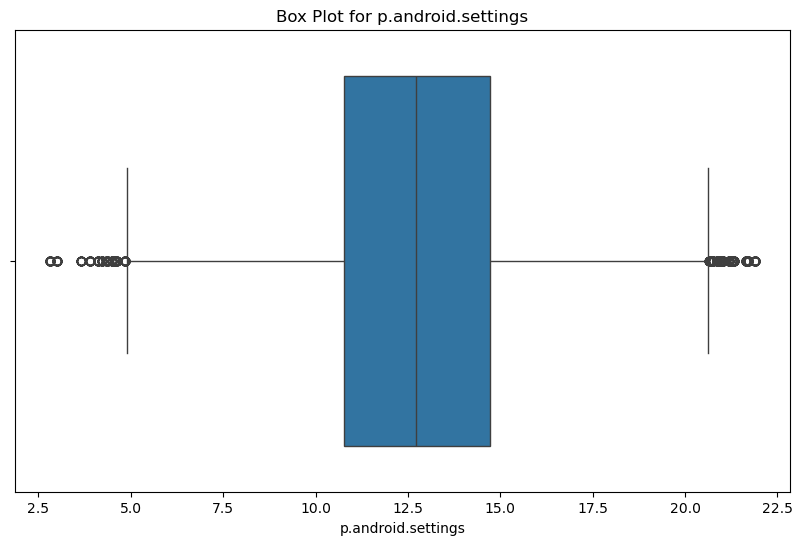

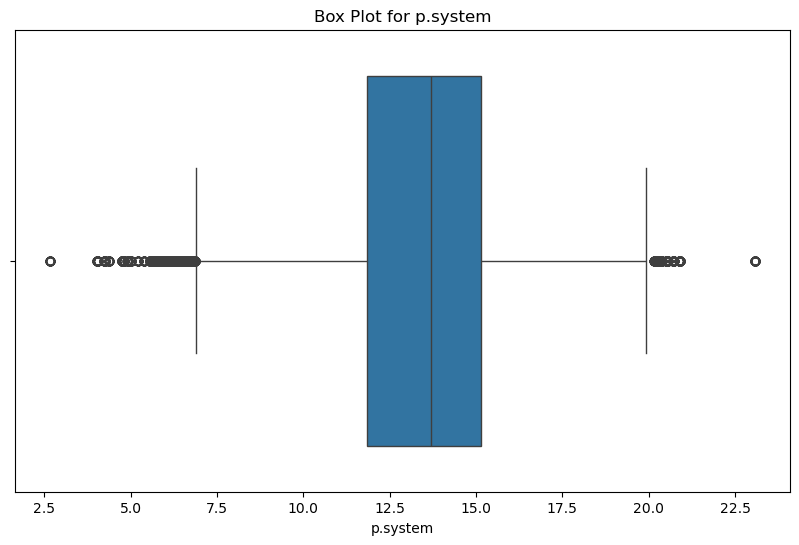

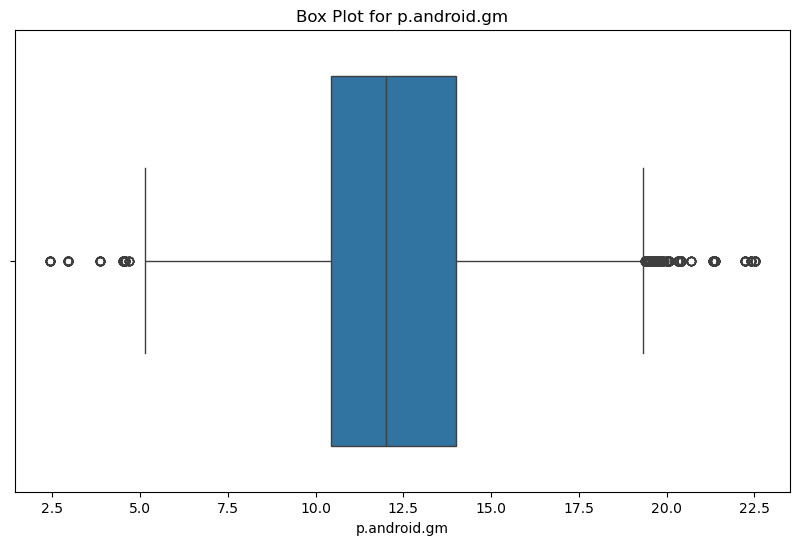

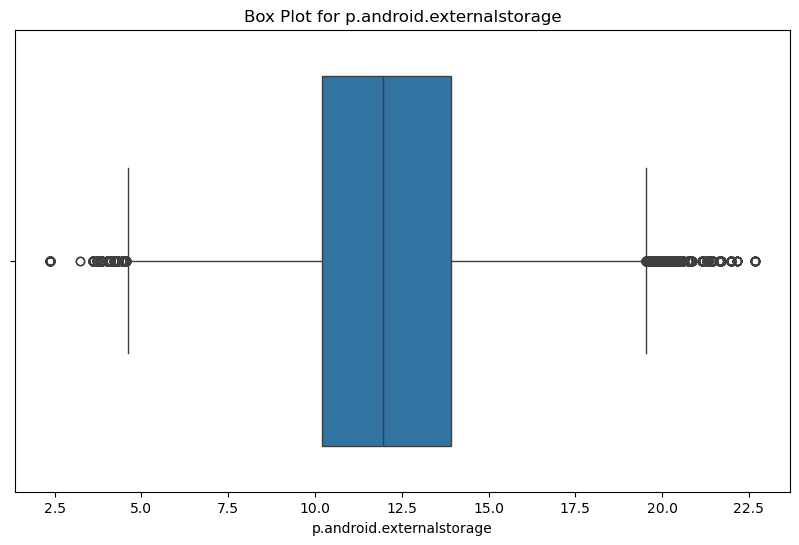

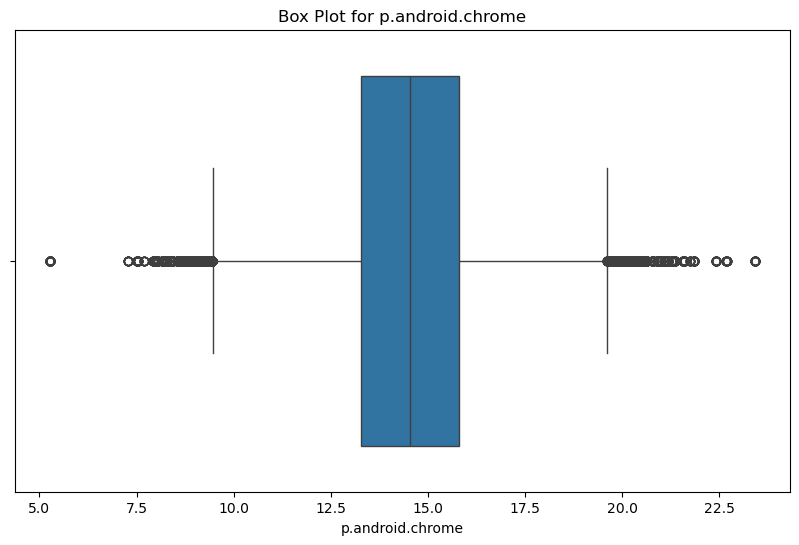

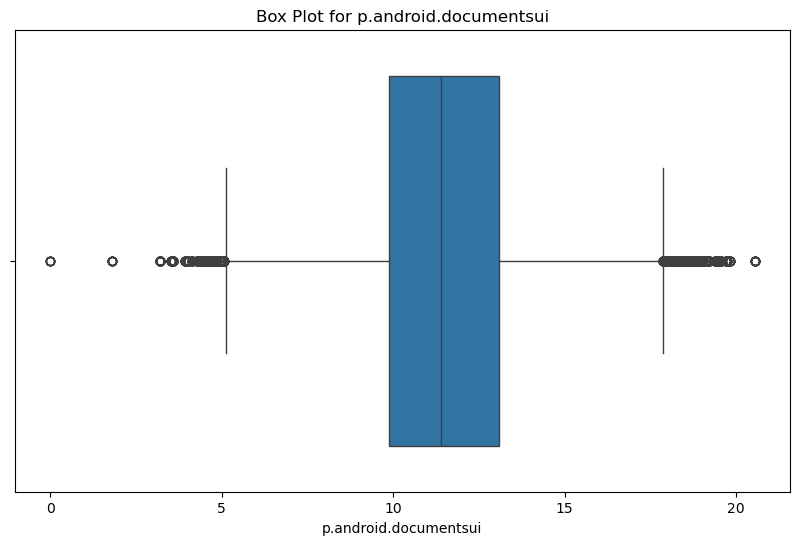

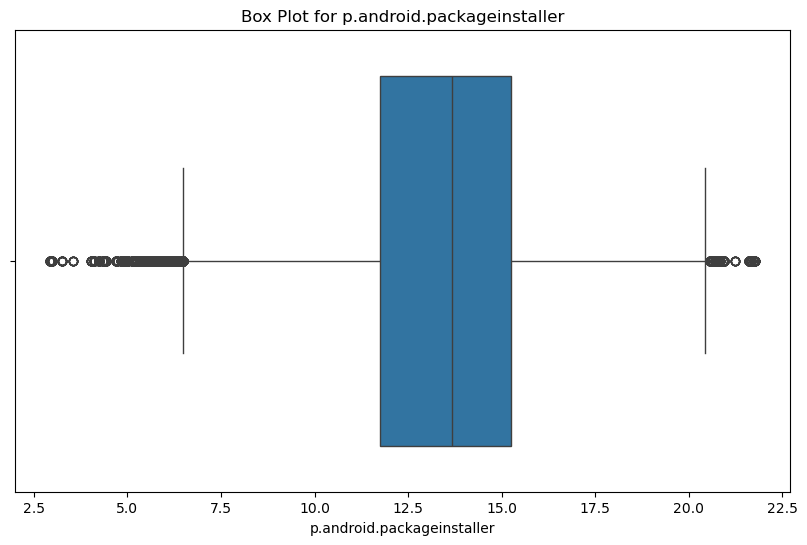

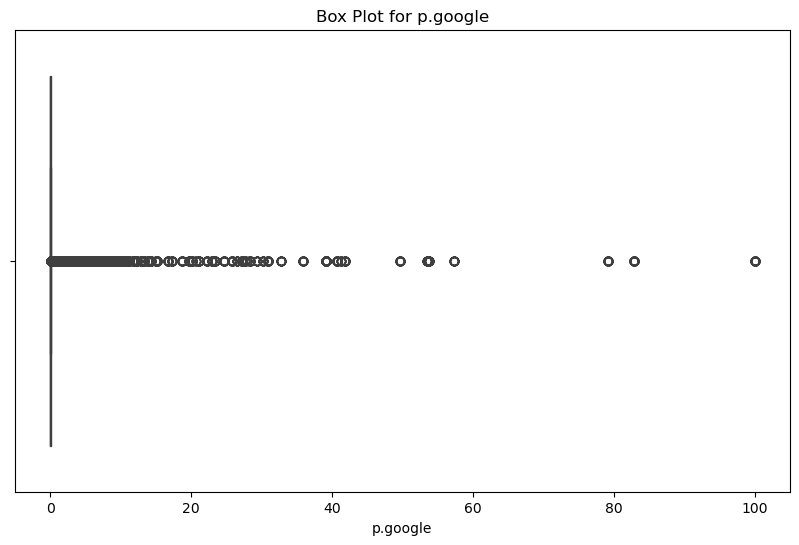

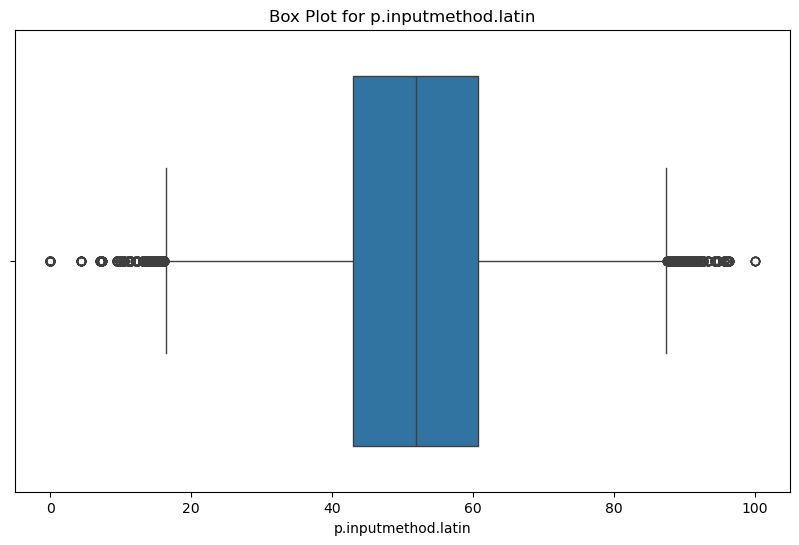

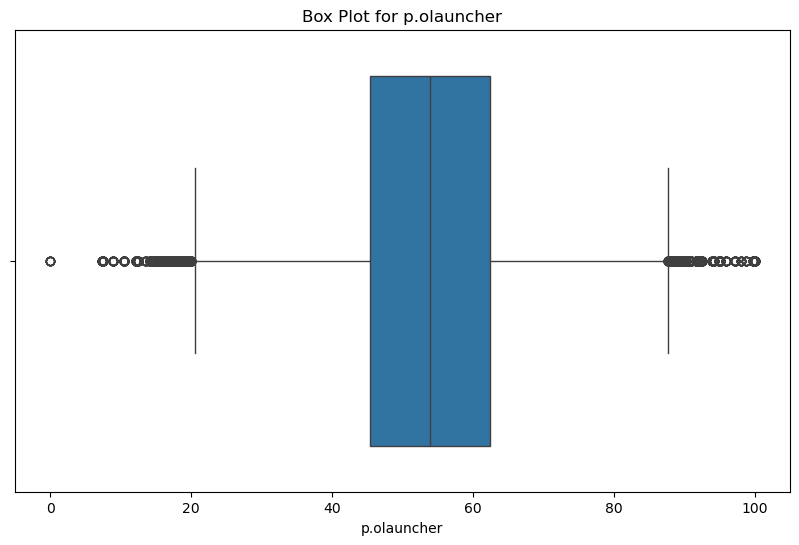

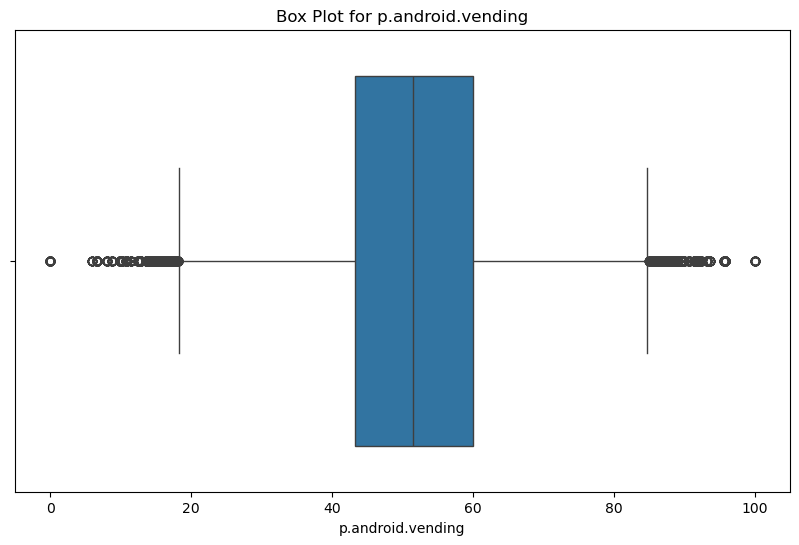

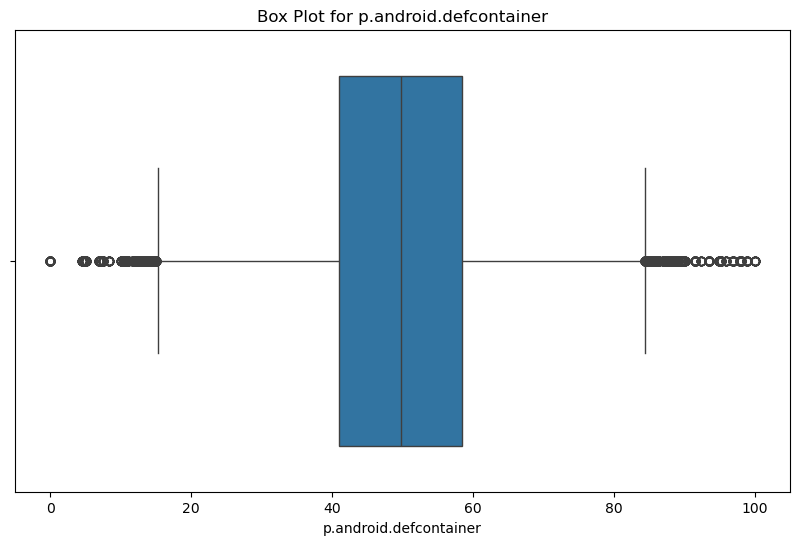

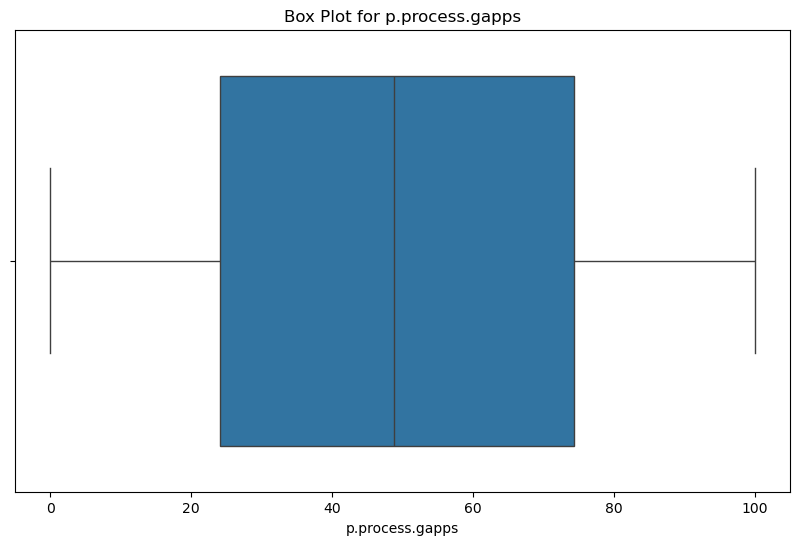

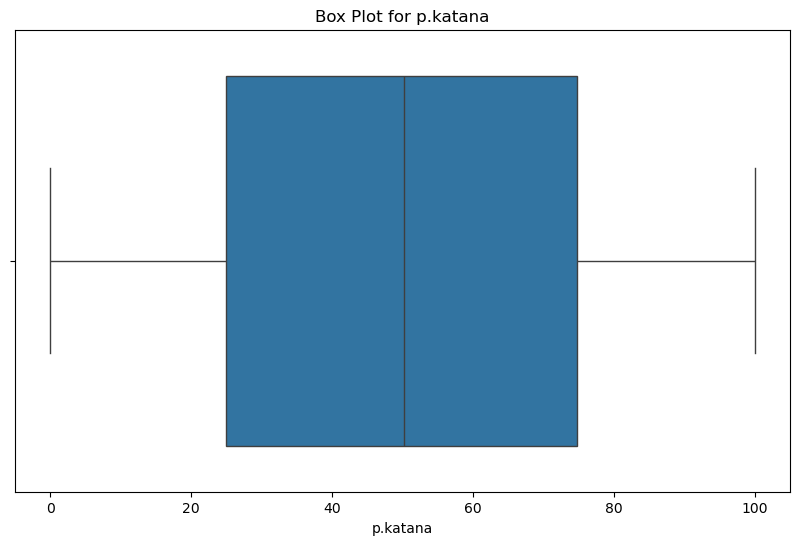

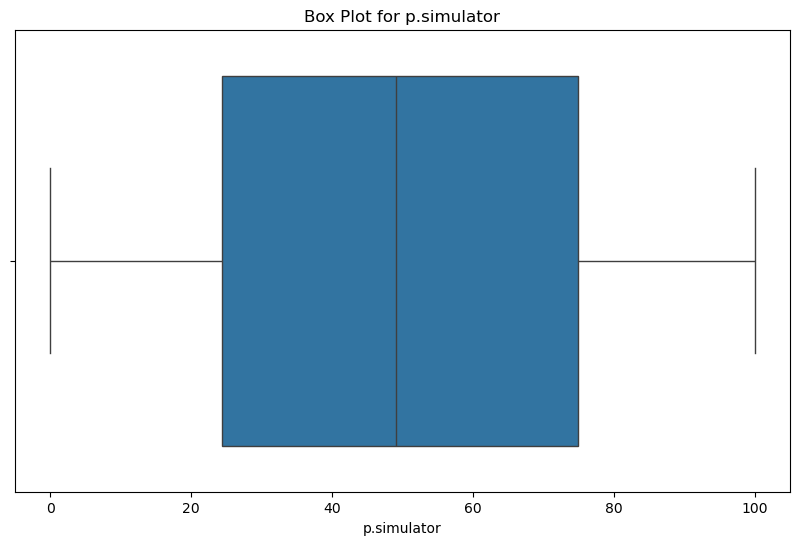

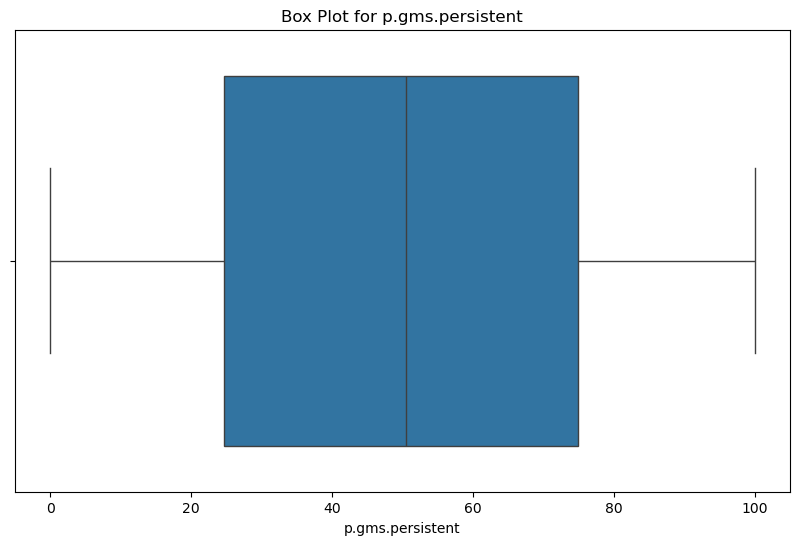

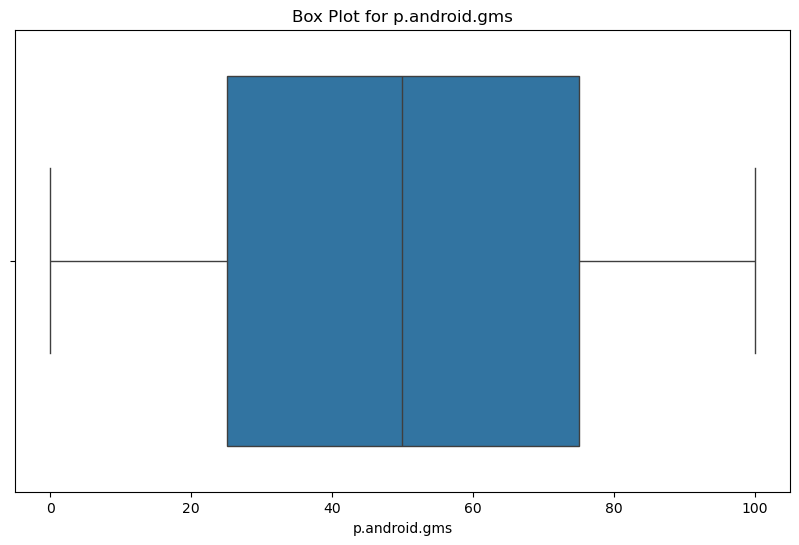

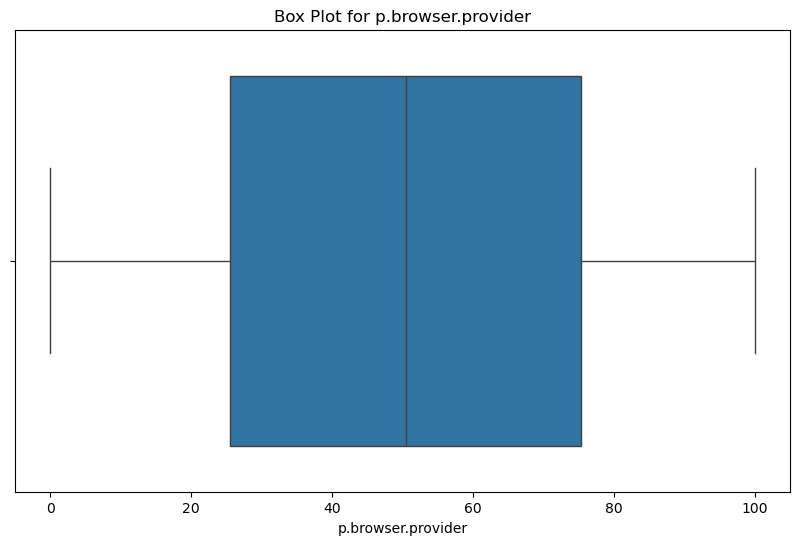

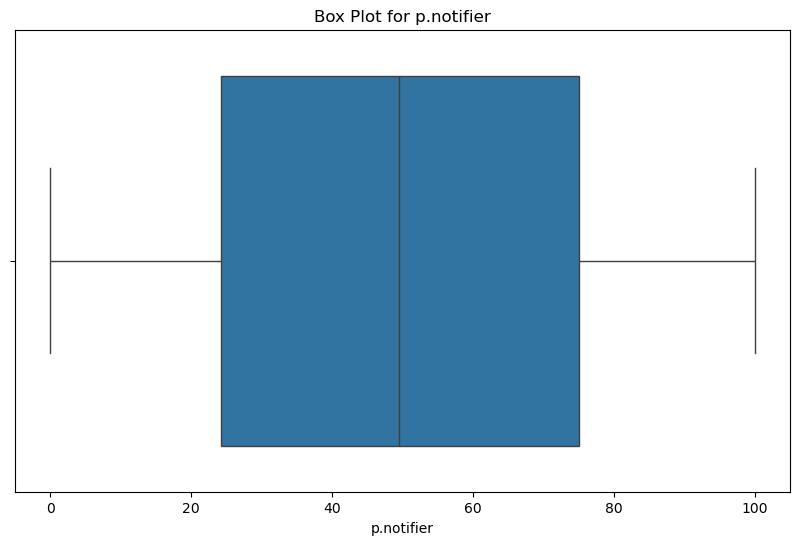

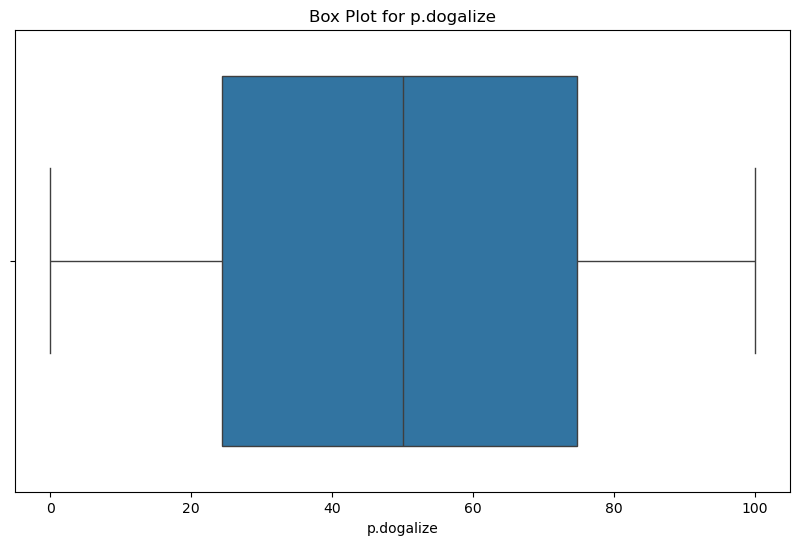

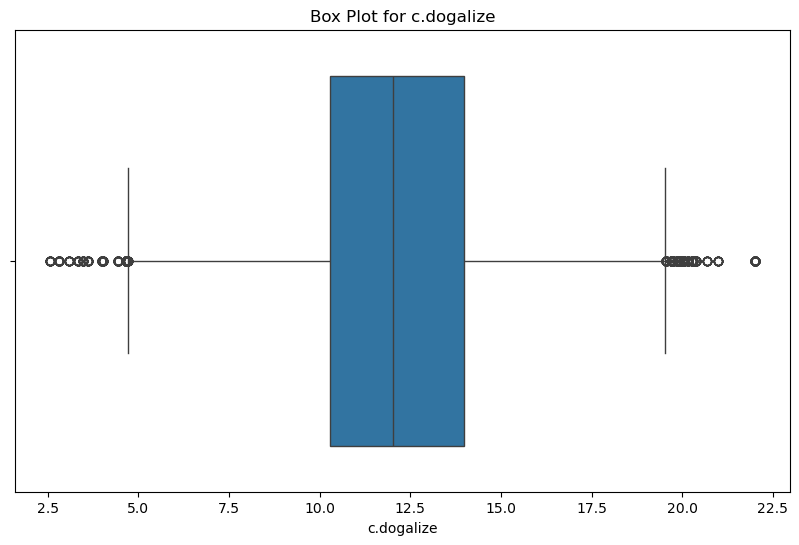

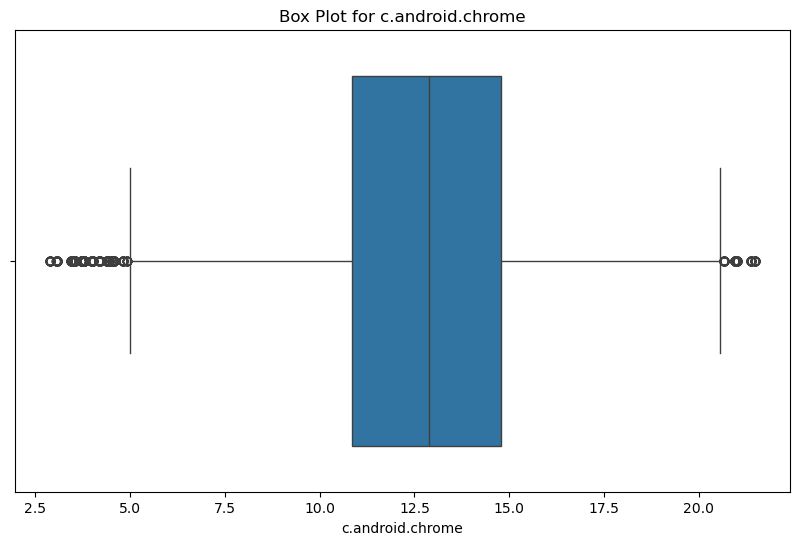

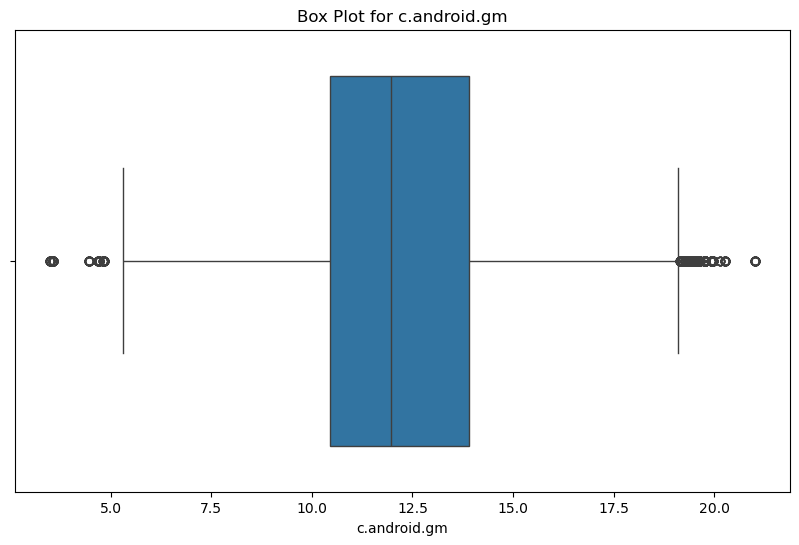

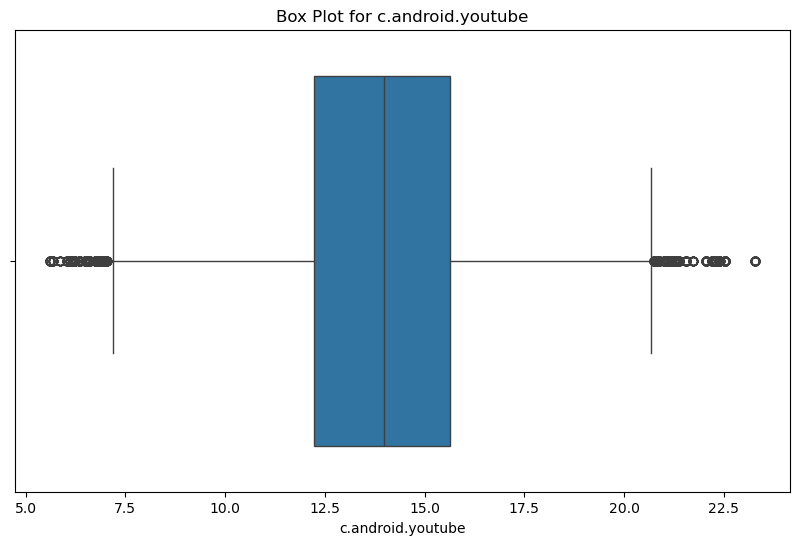

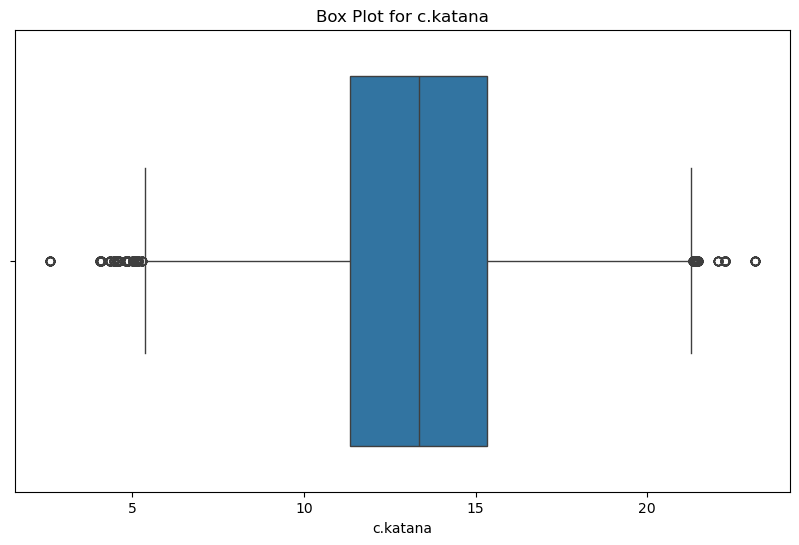

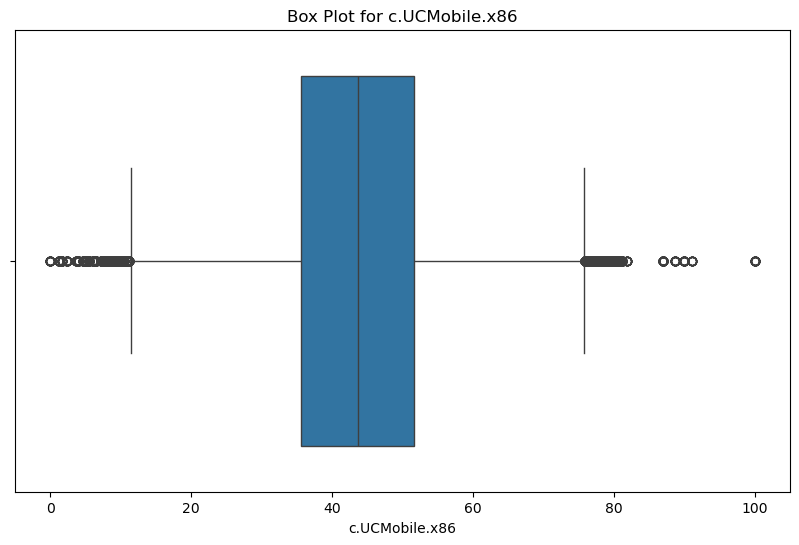

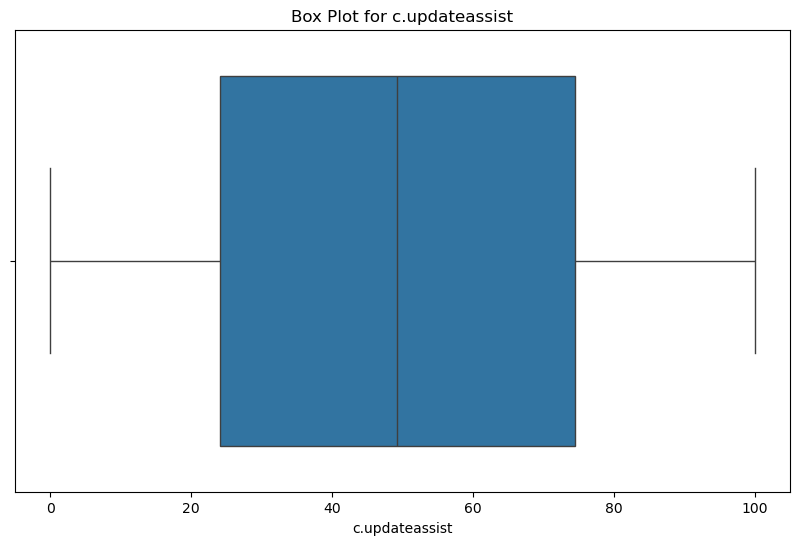

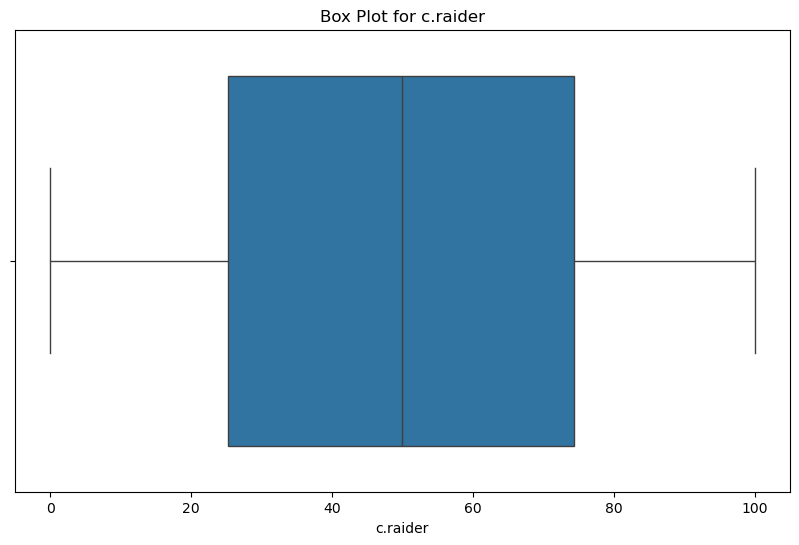

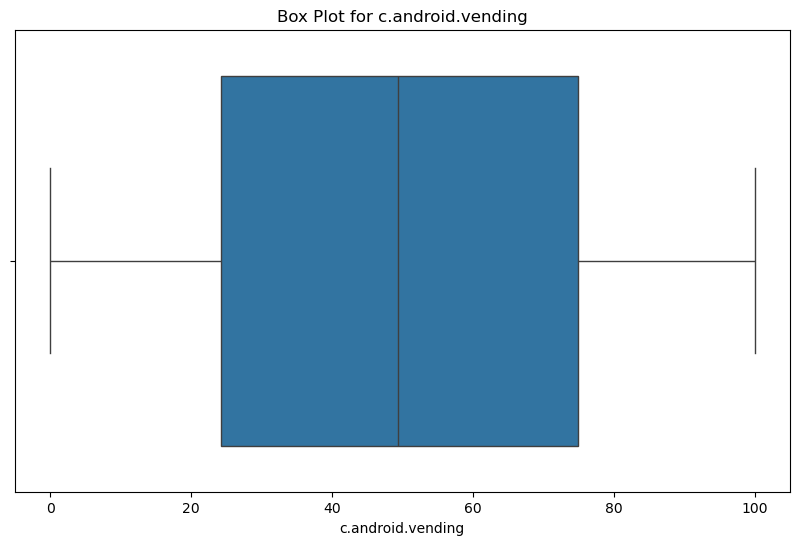

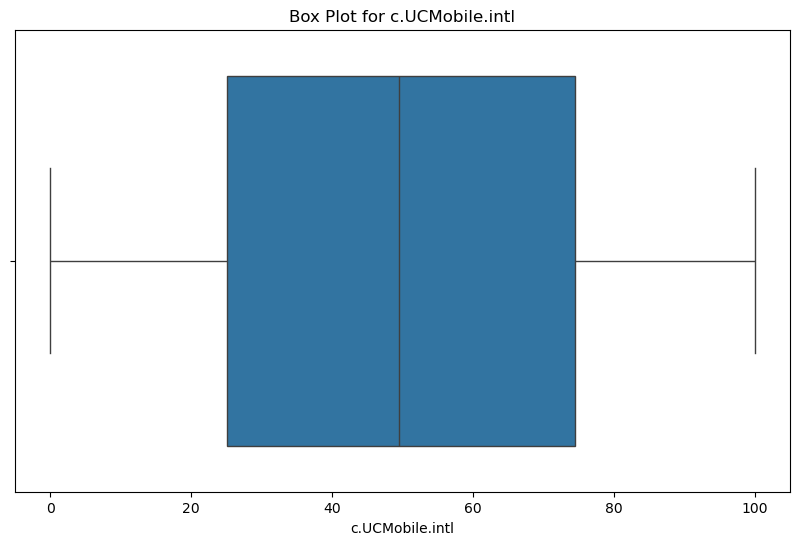

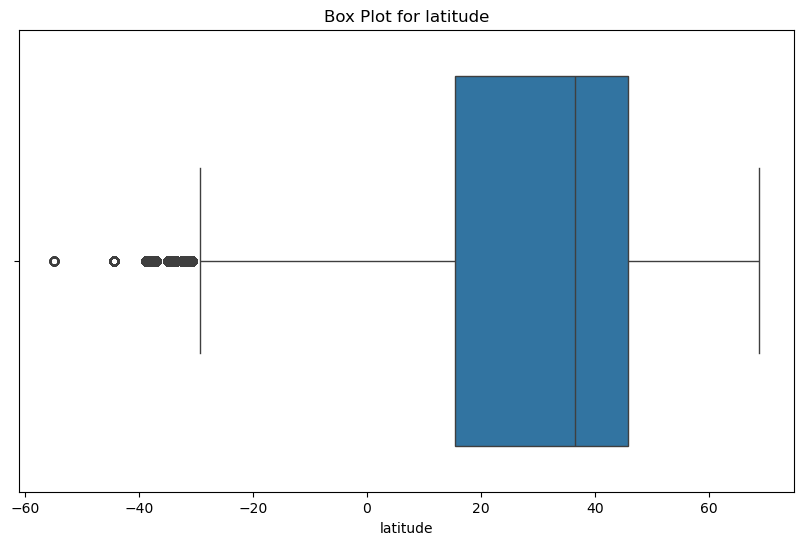

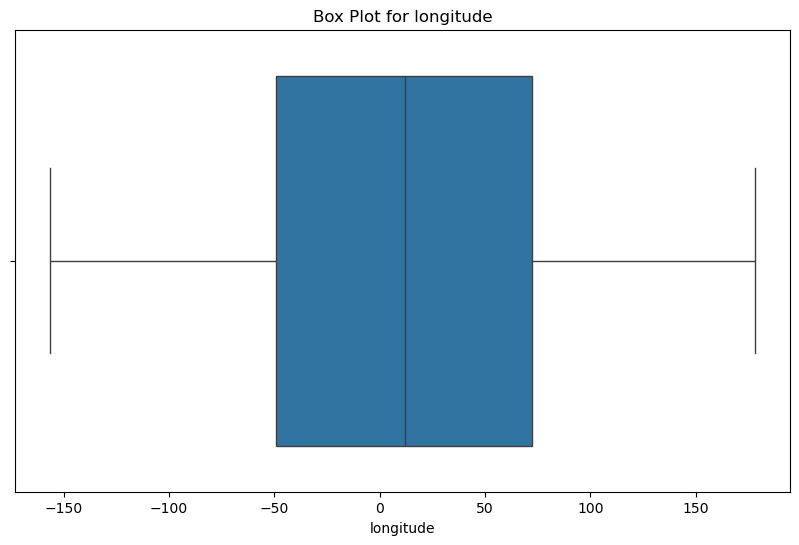

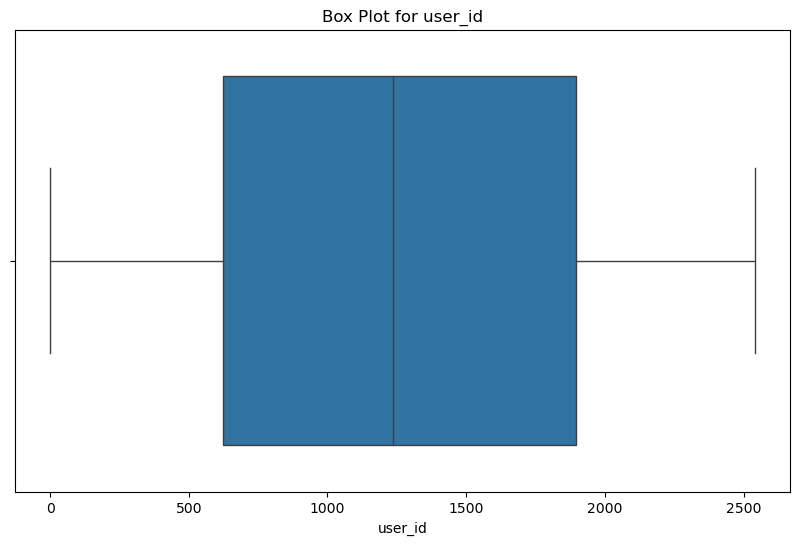

In [19]:
numeric_columns = df_merged.select_dtypes(include=['float64', 'int64']).columns
non_null_columns = [col for col in numeric_columns if df_merged[col].notnull().sum() > 0]

for column in non_null_columns:
    if (column == 'mwra' or column == 'imei'):
        continue
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_merged, x=column)
    plt.title(f'Box Plot for {column}')
    plt.show()

In [20]:
mwra_stats = df_merged['mwra'].value_counts(normalize=True)
print(" mwra stats:")
print(mwra_stats)

 mwra stats:
mwra
1.0    0.627475
0.0    0.372525
Name: proportion, dtype: float64


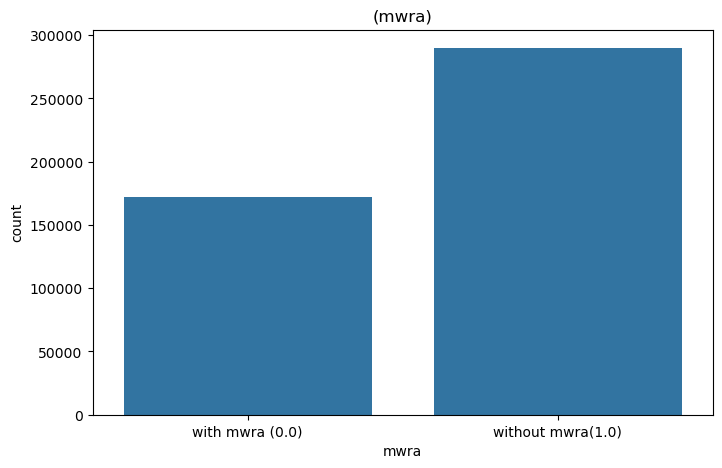

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(x='mwra', data=df_merged)
plt.title('(mwra)')
plt.xlabel('mwra')
plt.ylabel('count')
plt.xticks(ticks=[0, 1], labels=['with mwra (0.0)', 'without mwra(1.0)'])
plt.show()

In [22]:
df_merged['ts'] = pd.to_datetime(df_merged['ts'], errors = 'coerce')
print("describe year:\n")
print(df_merged['ts'].dt.year.describe())
print("\n describe month:\n")
print(df_merged['ts'].dt.month.describe())
print("\n describe day:\n")
print(df_merged['ts'].dt.month.describe())
print("\n describe hour:\n")
print(df_merged['ts'].dt.hour.describe())

describe year:

count    461875.0
mean       2018.0
std           0.0
min        2018.0
25%        2018.0
50%        2018.0
75%        2018.0
max        2018.0
Name: ts, dtype: float64

 describe month:

count    461875.0
mean          5.0
std           0.0
min           5.0
25%           5.0
50%           5.0
75%           5.0
max           5.0
Name: ts, dtype: float64

 describe day:

count    461875.0
mean          5.0
std           0.0
min           5.0
25%           5.0
50%           5.0
75%           5.0
max           5.0
Name: ts, dtype: float64

 describe hour:

count    461875.000000
mean         11.593076
std           6.814679
min           0.000000
25%           6.000000
50%          12.000000
75%          17.000000
max          23.000000
Name: ts, dtype: float64


In [23]:
df_merged['birthdate'] = pd.to_datetime(df_merged['birthdate'], errors='coerce')


birth_year_stats = df_merged['birthdate'].dt.year.describe()
print("\nDescriptive Statistics for Birth Year:")
print(birth_year_stats)



Descriptive Statistics for Birth Year:
count    254522.000000
mean       1967.328160
std          32.944513
min        1908.000000
25%        1938.000000
50%        1968.000000
75%        1996.000000
max        2024.000000
Name: birthdate, dtype: float64


In [24]:
# Frequency distribution for job
job_distribution = df_merged['job'].value_counts(normalize=True) * 100 
print("\nFrequency Distribution for Job:")
print(job_distribution.head(10)) 



Frequency Distribution for Job:
job
Hotel manager                       0.863259
Dealer                              0.860367
Therapist, nutritional              0.703477
Accountant, chartered management    0.680341
Chief of Staff                      0.671665
Associate Professor                 0.655036
Best boy                            0.630454
Exhibition designer                 0.613102
Scientist, biomedical               0.613102
Accounting technician               0.585628
Name: proportion, dtype: float64


# Bar plot for job distribution


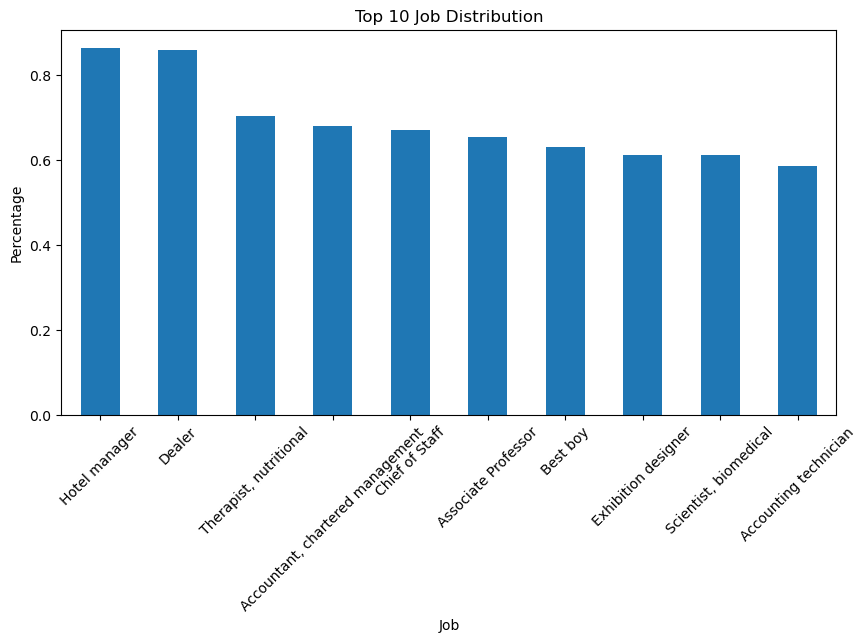

In [25]:
plt.figure(figsize=(10, 5))
job_distribution.head(10).plot(kind='bar')
plt.title('Top 10 Job Distribution')
plt.xlabel('Job')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

# Descriptive statistics for latitude and longitude

In [26]:
lat_long_stats = df_merged[['latitude', 'longitude']].describe()
print(lat_long_stats)


            latitude      longitude
count  461597.000000  461597.000000
mean       29.429025      13.222267
std        22.624089      72.063621
min       -54.800000    -156.474320
25%        15.451440     -49.273060
50%        36.533330      12.136900
75%        45.752790      72.545660
max        68.798330     178.004170


# values of store_name

In [27]:
store_name_counts = df_merged['store_name'].value_counts()
print(store_name_counts)

store_name
Gaziantep             1807
West Des Moines       1653
Maryborough           1607
Fontenay-aux-Roses    1484
Malnate               1436
                      ... 
Quimper                 38
Same                    35
Madhipura               31
Palmeira                31
Kundla                  24
Name: count, Length: 935, dtype: int64


# Descriptive statistics for p.android.chrome


In [28]:
chrome_stats = df_merged['p.android.chrome'].describe()
print("Descriptive Statistics for p.android.chrome:")
print(chrome_stats)


Descriptive Statistics for p.android.chrome:
count    461875.000000
mean         14.534028
std           1.900036
min           5.275180
25%          13.266430
50%          14.533640
75%          15.803430
max          23.407940
Name: p.android.chrome, dtype: float64


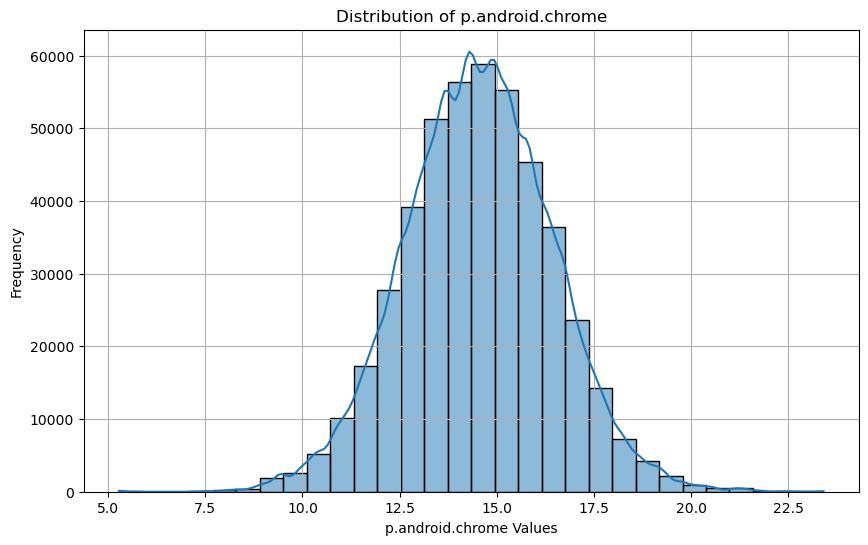

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['p.android.chrome'], bins=30, kde=True)
plt.title('Distribution of p.android.chrome')
plt.xlabel('p.android.chrome Values')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [30]:
gms_stats = df_merged['p.android.gms'].describe()
print("Descriptive Statistics for p.android.gms:")
print(gms_stats)

Descriptive Statistics for p.android.gms:
count    461875.000000
mean         50.109759
std          28.802338
min           0.000000
25%          25.167010
50%          49.927400
75%          75.092800
max         100.000000
Name: p.android.gms, dtype: float64


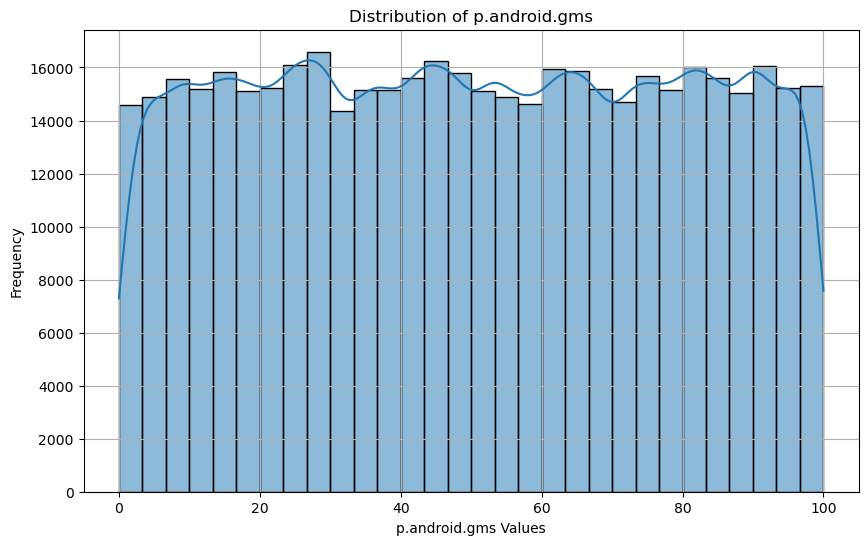

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['p.android.gms'], bins=30, kde=True)
plt.title('Distribution of p.android.gms')
plt.xlabel('p.android.gms Values')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# С1 

# between  latitude longitude and company(top 3 company)

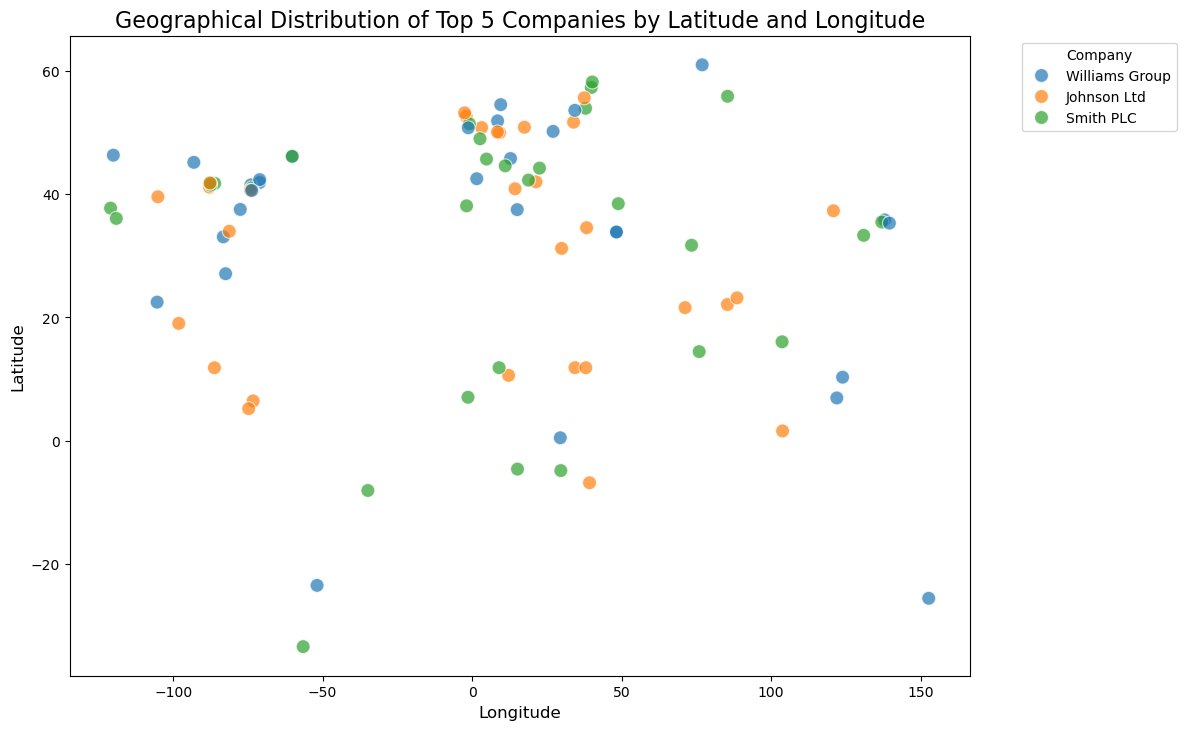

In [32]:
top_companies = user_location_data['company'].value_counts().head(3).index

filtered_data = user_location_data[user_location_data['company'].isin(top_companies)]

plt.figure(figsize=(12, 8))

sns.scatterplot(data=filtered_data, x='longitude', y='latitude', hue='company', palette='tab10', s=100, alpha=0.7)

plt.title('Geographical Distribution of Top 5 Companies by Latitude and Longitude', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(left=0.1, right=0.85, top=0.9, bottom=0.1)

plt.show()

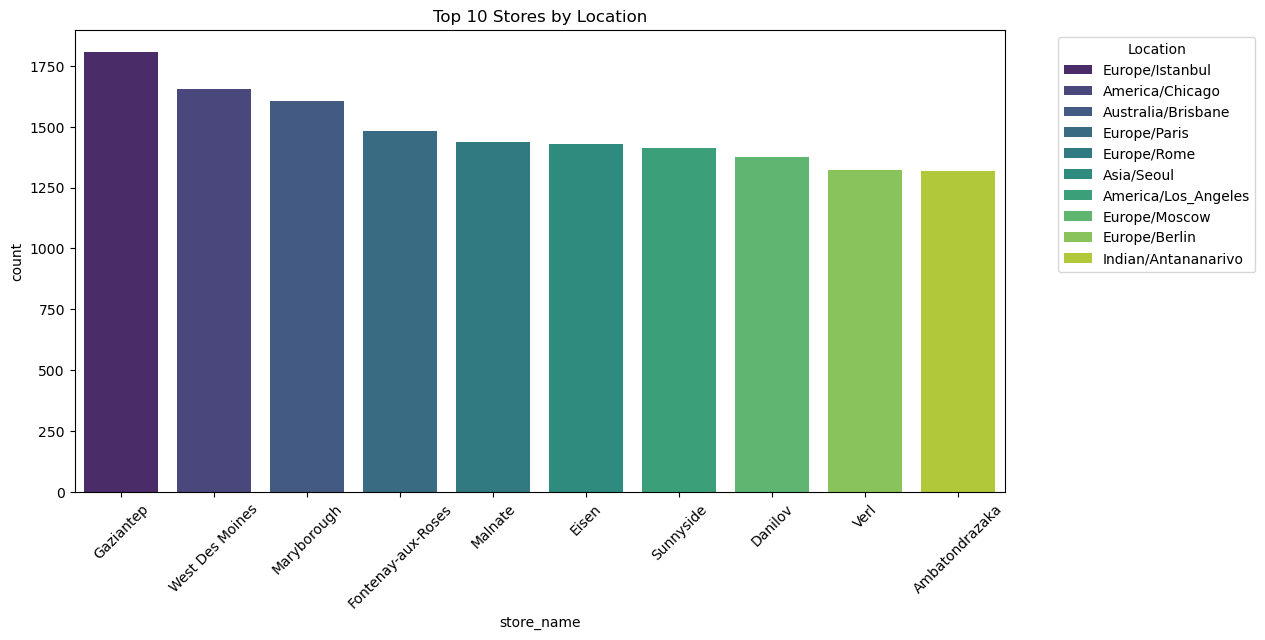

In [33]:
# Group by store_name and location
store_location_counts = df_merged.groupby(['store_name', 'location']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=store_location_counts.nlargest(10, 'count'), x='store_name', y='count', hue='location', palette='viridis')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Top 10 Stores by Location')
plt.xticks(rotation=45)
plt.show()


              location  store_count
0         Asia/Kolkata        34815
1     America/New_York        28842
2        Europe/Berlin        23464
3        Europe/London        18860
4      America/Chicago        18093
5        Asia/Shanghai        17242
6  America/Los_Angeles        16373
7          Europe/Rome        15673
8        Europe/Moscow        15490
9         Europe/Paris        14457


/var/folders/m5/qlchbmwd68q2nbdzzbwdj9sh0000gn/T/ipykernel_85370/4150223596.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_locations, x='location', y='store_count', palette='viridis')


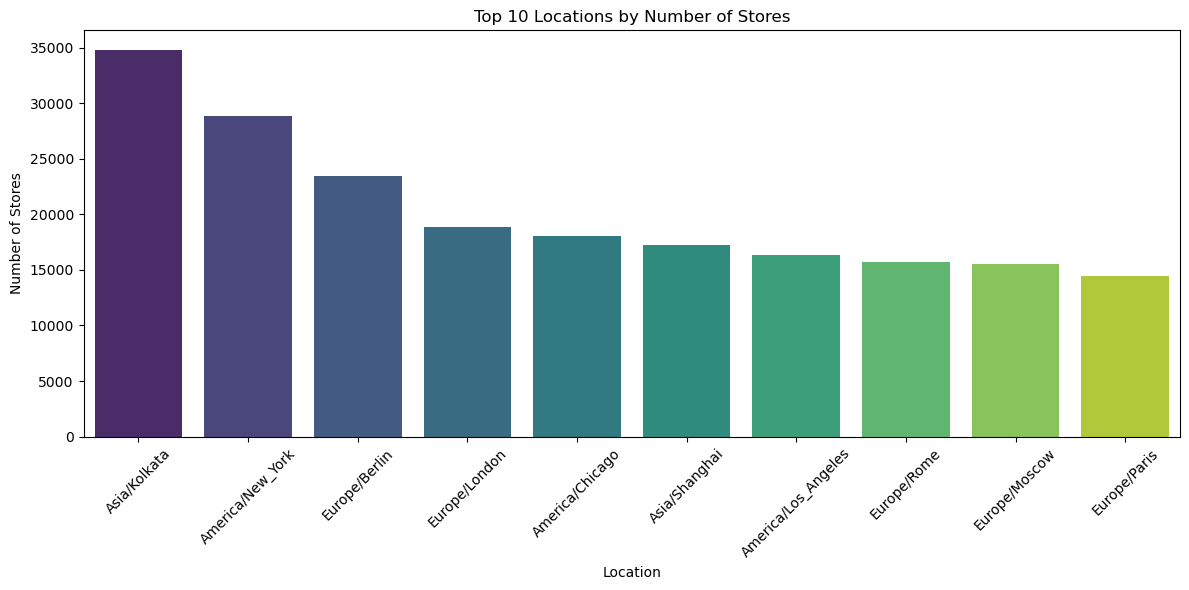

In [34]:
location_store_counts = df_merged['location'].value_counts().reset_index()
location_store_counts.columns = ['location', 'store_count']

top_locations = location_store_counts.sort_values(by='store_count', ascending=False).head(10)

print(top_locations)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_locations, x='location', y='store_count', palette='viridis')
plt.title('Top 10 Locations by Number of Stores')
plt.xlabel('Location')
plt.ylabel('Number of Stores')
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

# D-1(mwra)

Correlation matrix for mwra with selected variables (Group 1):
mwra                  1.000000
p.android.gm         -0.586948
p.android.chrome      0.002505
p.android.vending    -0.016531
p.android.settings    0.010197
Name: mwra, dtype: float64


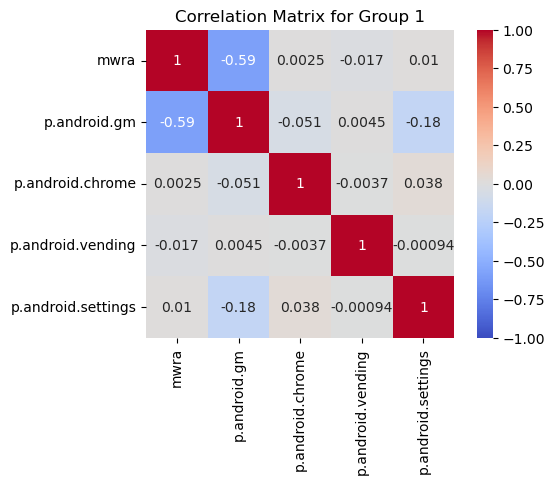

In [35]:
selected_columns_1 = df_merged[['mwra', 'p.android.gm', 'p.android.chrome', 'p.android.vending', 'p.android.settings']]

correlation_matrix_1 = selected_columns_1.corr()

print("Correlation matrix for mwra with selected variables (Group 1):")
print(correlation_matrix_1['mwra'])

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Correlation Matrix for Group 1')
plt.show()


Correlation matrix for mwra with selected variables (Group 2):
mwra                   1.000000
p.system              -0.292431
p.google               0.013691
p.inputmethod.latin   -0.004644
p.olauncher            0.001029
Name: mwra, dtype: float64


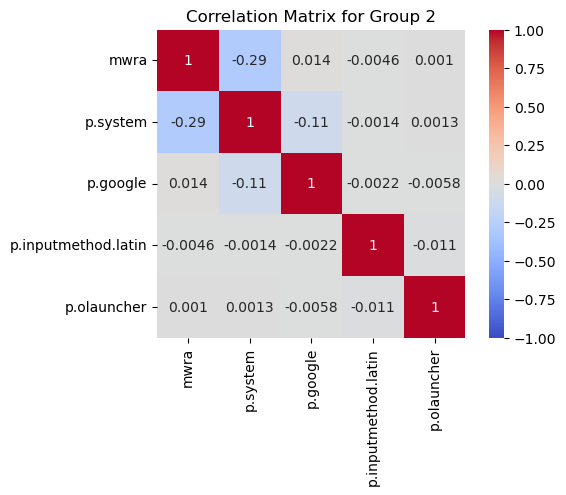

In [36]:
selected_columns_2 = df_merged[['mwra', 'p.system', 'p.google', 'p.inputmethod.latin', 'p.olauncher']]

correlation_matrix_2 = selected_columns_2.corr()

print("Correlation matrix for mwra with selected variables (Group 2):")
print(correlation_matrix_2['mwra'])

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Correlation Matrix for Group 2')
plt.show()


Correlation matrix for mwra with selected variables (Group 3):
mwra                 1.000000
c.android.chrome     0.006138
c.android.gm        -0.593096
c.android.youtube    0.299192
c.katana             0.514000
Name: mwra, dtype: float64


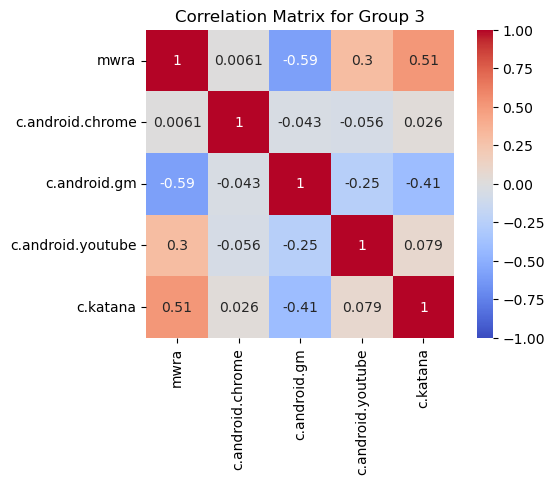

In [37]:
selected_columns_3 = df_merged[['mwra', 'c.android.chrome', 'c.android.gm', 'c.android.youtube', 'c.katana']]

correlation_matrix_3 = selected_columns_3.corr()

print("Correlation matrix for mwra with selected variables (Group 3):")
print(correlation_matrix_3['mwra'])

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_3, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Correlation Matrix for Group 3')
plt.show()


Correlation matrix for mwra with selected variables (Group 4):
mwra                         1.000000
p.android.externalstorage    0.263693
p.android.defcontainer       0.012976
p.katana                     0.006641
p.simulator                 -0.005272
Name: mwra, dtype: float64


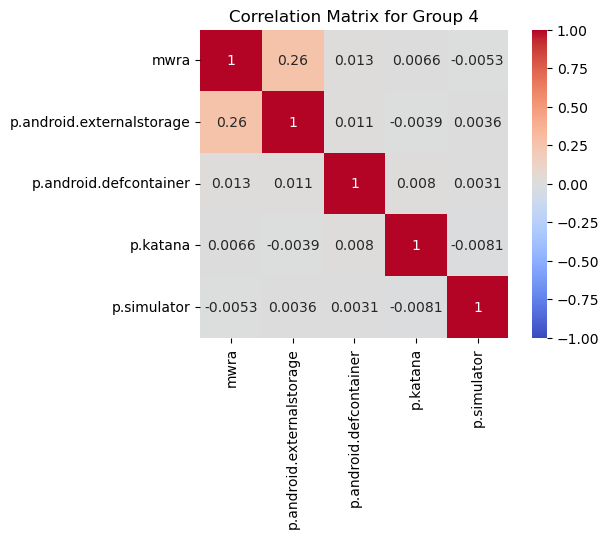

In [38]:
selected_columns_4 = df_merged[['mwra', 'p.android.externalstorage', 'p.android.defcontainer', 'p.katana', 'p.simulator']]

correlation_matrix_4 = selected_columns_4.corr()

print("Correlation matrix for mwra with selected variables (Group 4):")
print(correlation_matrix_4['mwra'])

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_4, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Correlation Matrix for Group 4')
plt.show()


# Dependencies between mwra and other variables:

## Strong negative correlations:

p.android.gm (-0.59)

c.android.gm (-0.59)

## Strong positive correlations:

c.katana (0.51)

c.android.youtube (0.30)

## Moderate correlations:

p.system (-0.29)

p.android.externalstorage (0.26)

## Weak or no correlations:

p.android.chrome, p.google, p.inputmethod.latin (close to 0)

show when mwra ==1.0

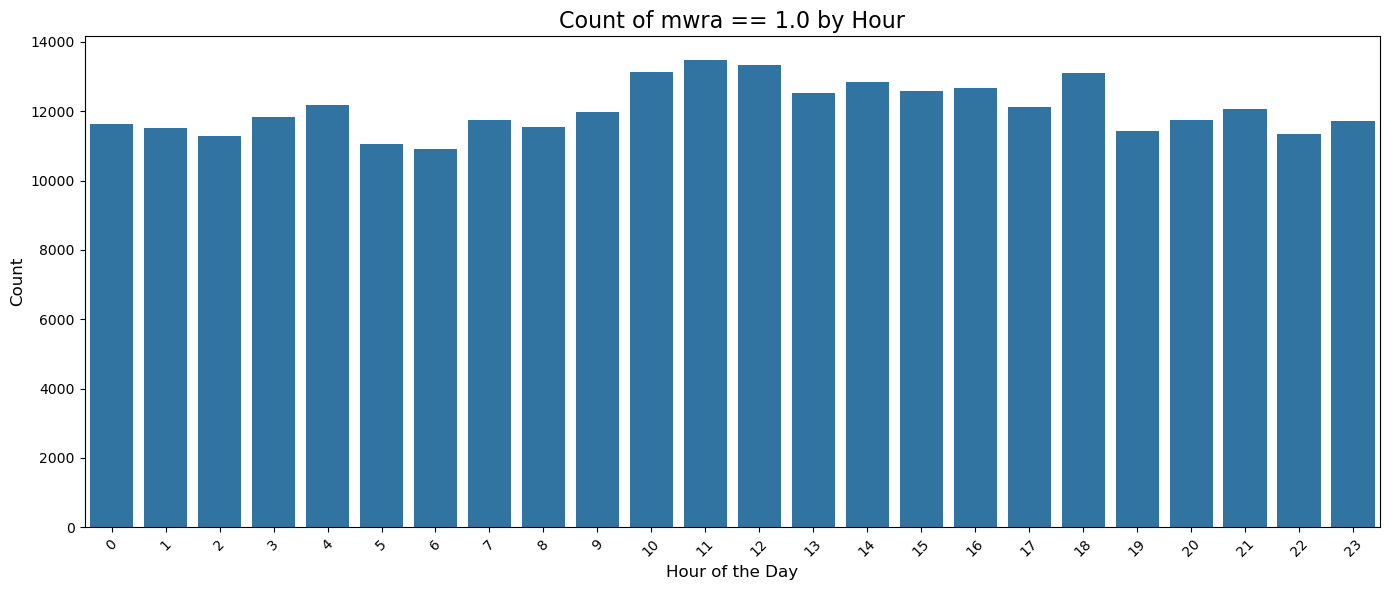

In [39]:
df_merged['ts'] = pd.to_datetime(df_merged['ts'], errors='coerce')

mwra_counts_by_hour = df_merged[df_merged['mwra'] == 1.0].groupby(df_merged['ts'].dt.hour).size().reset_index(name='count')

plt.figure(figsize=(14, 6))
sns.barplot(data=mwra_counts_by_hour, x='ts', y='count')  
plt.title('Count of mwra == 1.0 by Hour', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=range(24), labels=range(24), rotation=45)
plt.tight_layout()
plt.show()

# E_1 

### Yes some attribytes has dependencies. You can see strong and weak correlation.Also there is dependencies beetween store_names and locations.

### There are also some outliers in p. and c. values that we need to fix. 

### Je potrebné kombinovať záznamy z viacerých súborov? Yes for better understanding of data we need to combine cvs in one df

# Identifikácia problémov, integrácia a čistenie dát

In [40]:

print("Number of duplicate records in merged dataset before cleaning:", df_merged.duplicated().sum())
df_merged_clean = df_merged.drop_duplicates()
print("Number of duplicate records in cleaned dataset:", df_merged_clean.duplicated().sum())

Number of duplicate records in merged dataset before cleaning: 15907
Number of duplicate records in cleaned dataset: 0


In [41]:
# Drop rows where username, mail, name are null
df_merged = df_merged.dropna(subset=['username', 'mail', 'name'])

print(f"Number of rows after removing null 'username', 'mail', or 'name': {len(df_merged)}")

print("Null values in 'username', 'mail', and 'name' after cleaning:")
print(df_merged[['username', 'mail', 'name']].isnull().sum())

Number of rows after removing null 'username', 'mail', or 'name': 461665
Null values in 'username', 'mail', and 'name' after cleaning:
username    0
mail        0
name        0
dtype: int64


In [42]:
# Date to the same format
df_merged['registration'] = pd.to_datetime(df_merged['registration'], errors='coerce')

df_merged['registration'] = df_merged['registration'].dt.strftime('%d-%m-%Y')
print("Number of NaN values after date conversion:", df_merged['registration'].isnull().sum())

print("Unique values in 'registration' after conversion:")
print(df_merged['registration'].unique()[:10])
# We need to decide what to do with the NaN vaulues in Date

Number of NaN values after date conversion: 346623
Unique values in 'registration' after conversion:
['09-12-2018' '20-07-2022' nan '27-08-2018' '01-01-2022' '19-07-2018'
 '30-03-2019' '14-11-2019' '06-09-2024' '21-04-2019']


In [43]:
df_merged['latitude'] = df_merged['latitude'].fillna(df_merged['latitude'].median())
df_merged['longitude'] = df_merged['longitude'].fillna(df_merged['longitude'].mean())
nan_latitude_longitude = df_merged[df_merged['latitude'].isnull() | df_merged['longitude'].isnull()]

# Print the rows that have NaN in latitude or longitude
print(nan_latitude_longitude[['latitude', 'longitude']])

Empty DataFrame
Columns: [latitude, longitude]
Index: []


In [44]:
df_merged['current_location'] = df_merged['current_location'].str.replace("Decimal('", "", regex=False)
df_merged['current_location'] = df_merged['current_location'].str.replace("')", "", regex=False)
df_merged['current_location'] = df_merged['current_location'].str.replace("(", "", regex=False)
df_merged['current_location'] = df_merged['current_location'].str.replace(")", "", regex=False)

df_merged[['latitude', 'longitude']] = df_merged['current_location'].str.split(', ', expand=True)

df_merged['latitude'] = df_merged['latitude'].astype(float)
df_merged['longitude'] = df_merged['longitude'].astype(float)

df_merged.drop('current_location', axis=1, inplace=True)

print(df_merged[['latitude', 'longitude']])

print(f"Total number of rows in the dataset: {len(df_merged)}")
# Change the null to median beacuase it is location

         latitude   longitude
0       53.210565   53.050848
1       70.358526 -174.034910
2       79.990253  108.065060
3      -68.940105  -56.550552
4      -71.935019 -145.662081
...           ...         ...
461870  57.978502 -111.526364
461871 -86.540517 -162.224046
461872 -14.610902 -152.841799
461873 -80.461834  -22.012124
461874  78.300093 -128.824160

[461665 rows x 2 columns]
Total number of rows in the dataset: 461665


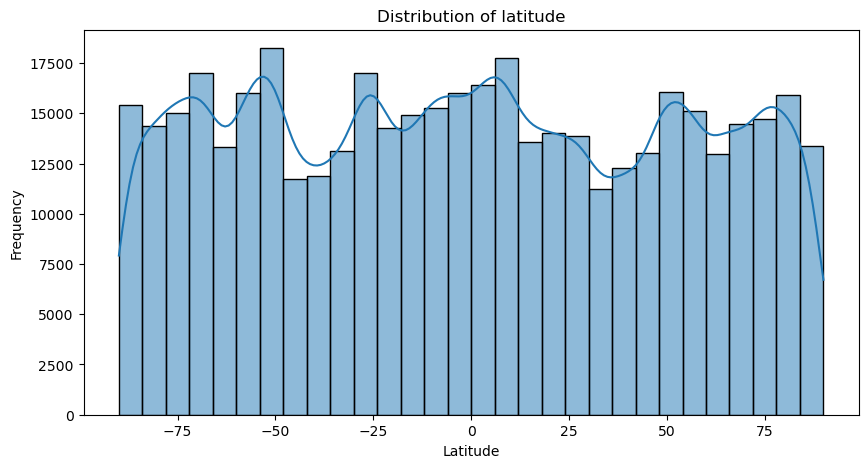

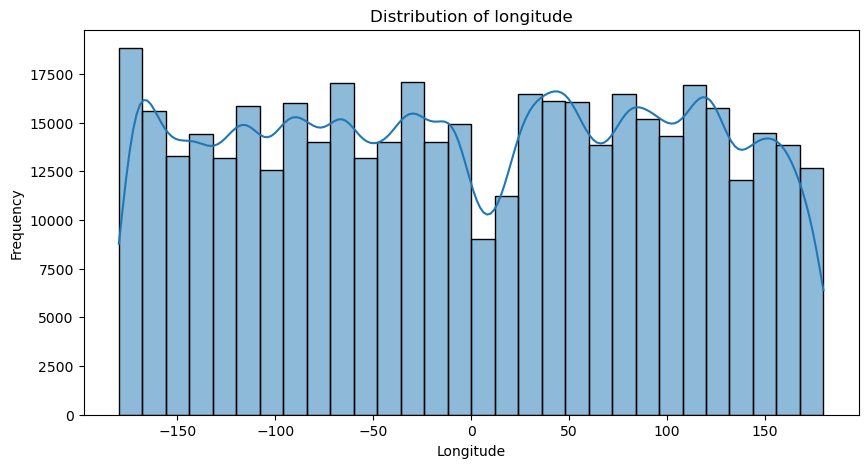

In [45]:
plt.figure(figsize=(10, 5))
sns.histplot(df_merged['latitude'], kde=True, bins=30)
plt.title('Distribution of latitude')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df_merged['longitude'], kde=True, bins=30)
plt.title('Distribution of longitude')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.show()

### Dropping all locations with null values and inplace residences with values of location

In [46]:
df_merged.dropna(subset=['location'], inplace=True)

In [47]:
df_merged['residence'] = df_merged['residence'].fillna(df_merged['location'])

In [48]:
# Convert mwra to boolean type
df_merged['mwra'] = df_merged['mwra'].astype(bool)
print(df_merged['mwra'].dtype)
print(df_merged['mwra'])

bool
0         False
1         False
2         False
3         False
4         False
          ...  
461870     True
461871     True
461872     True
461873     True
461874     True
Name: mwra, Length: 461387, dtype: bool


# Outliers

In [49]:
def replace_outliers_with_boundaries(df, column):
    lower_bound = df[column].quantile(0.05)  
    upper_bound = df[column].quantile(0.95) 
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

columns_to_replace_outliers = [
    'p.android.settings', 'p.system', 'p.google',
    'p.android.gm', 'p.android.externalstorage', 'p.android.chrome'
    # We can add more here, just dont know yet which to delete and which to replace
]

# Apply the replacement for all 
for column in columns_to_replace_outliers:
    df_merged = replace_outliers_with_boundaries(df_merged, column)

In [50]:
columns_to_check = [
    'p.android.settings', 'p.system', 'p.android.gm', 'p.android.externalstorage', 
    'p.android.chrome', 'p.android.documentsui', 'p.android.packageinstaller', 
    'p.google', 'p.inputmethod.latin', 'p.olauncher', 'p.android.vending', 
    'p.android.defcontainer', 'p.process.gapps', 'p.katana', 'p.simulator', 
    'p.gms.persistent', 'p.android.gms', 'p.browser.provider', 'p.notifier', 
    'p.dogalize', 'c.dogalize', 'c.android.chrome', 'c.android.gm', 'c.android.youtube', 
    'c.katana', 'c.UCMobile.x86', 'c.updateassist', 'c.raider', 'c.android.vending', 
    'c.UCMobile.intl'
]
def check_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"Column: {column}")
    print(f"Number of outliers: {len(outliers)}")
    
    if len(outliers) > 0:
        print(outliers[[column]].head())
    print("\n")

for column in columns_to_check:
    check_outliers(df_merged, column)

Column: p.android.settings
Number of outliers: 0


Column: p.system
Number of outliers: 0


Column: p.android.gm
Number of outliers: 0


Column: p.android.externalstorage
Number of outliers: 0


Column: p.android.chrome
Number of outliers: 0


Column: p.android.documentsui
Number of outliers: 3033
      p.android.documentsui
1709                4.27648
1710                4.27648
1711                4.27648
1712                4.27648
1713                4.27648


Column: p.android.packageinstaller
Number of outliers: 4090
      p.android.packageinstaller
7777                     21.2215
7778                     21.2215
7779                     21.2215
7780                     21.2215
7781                     21.2215


Column: p.google
Number of outliers: 73102
     p.google
108   0.20654
109   0.20654
110   0.20654
111   0.20654
112   0.20654


Column: p.inputmethod.latin
Number of outliers: 2715
       p.inputmethod.latin
22693             87.69837
22694             87.69837
22695   

# Hypotezy

In [51]:
group1 = df_merged[df_merged['mwra'] == 1]['p.google']
group2 = df_merged[df_merged['mwra'] == 0]['p.google']

# t-test
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Significant difference in p.google usage.")
else:
    print("No significant difference in p.google usage.")

T-statistic: 10.122884092034695, P-value: 4.405011863776458e-24
Significant difference in p.google usage.


In [52]:
# Levenes test
levene_stat, p_value = stats.levene(group1, group2)

print(f"Levene-statistic: {levene_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Significant difference in variance of p.android.chrome.")
else:
    print("No significant difference in variance.")

Levene-statistic: 98.20133357955982, P-value: 3.799553242011421e-23
Significant difference in variance of p.android.chrome.


# Odpovede na otazky
Áno, dáta majú potenciálne vhodný formát pre ďalšie spracovanie.
Identifikované problémy:
Chýbajúce hodnoty, nekonzistentne datove typy, outliers
Hore som opisoval postup ako sme taketo problemy riesili.

# Creating class NotDefined for job. 
It will help in future parts of project

In [53]:
class NotDefined:
    def __init__(self):
        self.description = "Job not defined"

df_merged['job'] = df_merged['job'].fillna(NotDefined())